

<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 



<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

<div align="center"> <b>UF: APPRENTISSAGE STATISTIQUE </b></div>
<div align="center"> SELMANI Merwann, LEGER Benjamin </div>
<div align="center"> <i> 5 GMM-MMS </i> </div>



# Projet Apprentissage Statistique:  Score d’appétence de la carte visa premier

## Introduction

Ce calepin fait suite à l'étude exploratoire de données bancaires effectuée dans le cadre de la 4ème année GMM, présente et téléchargable [ici](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb).

Cette première étape avait entre autre permis de **mettre en forme ces données**, notamment via une étude uni et bivariée de celles-ci, mais également de mieux **définir les structures de liens entre les différentes variables**, et enfin de **definir les caractéristiques propres des possesseurs de la carte Visa Premier**.

L'objet de l'étude que nous mènerons ici est d'appliquer différentes méthodes d'**apprentissage statistique** à nos données afin de tenter de prédire la probabilité de possession d’une carte visa premier pour des clients donnés (on parle de **score d'appétence**). 

Ce callepin s'articule autour de la démarche classique de l'apprentissage statistique: 
* Nous débuterons en effet par un **rappel des principales transformations opérées dans le scénario précédent**
* Puis nous séparerons notre **échantillon total en un échantillon de test et un échantillon d'apprentissage** 
* Nous appliquerons plusieurs familles de modèles pour lesquelles nous **optimiserons divers paramètres de complexité** par cross-validation sur l'échantillon test pour ensuite calculer les **erreurs de prévision sur l'échantillon test** pour les meilleurs modèles de chaque famille.
* Enfin une **comparaisons de modèles** sera effectuée.

En ce qui concerne les méthodes utilisées, nous étudierons:

* **La regression logistique**
* **L'analyse discriminante décisionelle**
* **Les arbres binaires de décisions **
* **Trois méthodes d'aggrégation de modèle (Bagging, Boosting, Random-Forests)**
* **Les SVM**


Ce callepin est réalisé en langage  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="R"/></a> et se base sur l'étude réalisée en <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a> disponible [ici](https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf).

Une **comparaison des fonctionalités, avantages/incovenients associés à chaque langage** sera d'ailleurs réalisée tout au long de ce "notebook".


## Lecture et premiers traitements sur les données: 

Dans un premier temps reprenons le travail réalisé en 4ème année de mise en forme de ces données. Pour cela nous nous basons sur le code [disponible ici](https://github.com/wikistat/Exploration/tree/master/GRC-carte_Visa).

Le but est ici de réaliser différentes opérations de **mise en forme**, **restructuration** et **transformation** des **données brutes** ("visa_raw") fournies [ici](https://www.math.univ-toulouse.fr/~besse/Wikistat/data/).

Nous ne revenons pas ici en détail sur ces opérations déjà bien décrites lors d'un travail antérieur. 

In [2]:
#-- Importation des librairies --# 
%matplotlib inline
import pylab as P
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

On importe dans un premier temps les données.

In [3]:
#-- Lecture des données --#
listeVar=['MATRIC','DEPTS','PVS','SEXEQ','AGER','FAMIQ', 
 'RELAT','PCSPQ','QUALS','G03G04S','G25G26S', 
 'G29G30S','G35G36S','G37G38S','G45G46S','G47G48S',
 'IMPNBS','REJETS','OPGNB','MOYRV','TAVEP','ENDET','GAGET',
 'GAGEC','GAGEM','KVUNB','QSMOY','QCRED','DMVTP','BOPPN',
 'FACAN','LGAGT','VIENB','VIEMT','UEMNB','UEMMTS','XLGNB',
 'XLGMT','YLVNB','YLVMT','NBELTS','MTELTS','NBCATS','MTCATS',
 'NBBECS','MTBECS','ZOCNB','NTCAS','NPTAG','SEGV2S','ITAVC',
 'HAVEF','JNBJD1S','JNBJD2S','JNBJD3S','CARVP']

path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
visaraw = pd.read_table(path+'visa_raw_sas.dat',
                        sep=';',header=None, index_col=0, names=listeVar)


On **redéfini le type** des variables qualitatives et on **recode** certaines.

In [4]:
#-- Fonction pour définir le bon type "categorical" des variables qualitatives --#
#-- avec dictionnaire des modalités pour le recodage --#
def create_categorical_data(df,column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [5]:
#FAMIQ
cat_name_dic = {'C':'Fcel','D':'Fdiv','M':'Fmar','S':'Fsep','U':'Fuli','V':'Fveu','inc':'Finc'}
visaraw["FAMIQ"]=create_categorical_data(visaraw,"FAMIQ", cat_name_dic)
#SEXEQ
cat_name_dic = {'1':'Shom','2':'Sfem','inc':'Sinc'}
visaraw["SEXEQ"]=create_categorical_data(visaraw,"SEXEQ", cat_name_dic)
#CARVP
cat_name_dic = {'non':'Cnon','oui':'Coui'}
visaraw["CARVP"]=create_categorical_data(visaraw,"CARVP", cat_name_dic)
#PCSPQ
visaraw["PCSPQ"] = visaraw["PCSPQ"].str.get(0).replace("0","i")
cat_name_dic = {'1':'Pagr', '2':'Part', '3':'Pcad', '4':'Pint', '5':'Pemp','6':'Pouv',
                '7':'Pret', '8':'Psan', 'i':'Pinc'}
visaraw["PCSPQ"]=create_categorical_data(visaraw,"PCSPQ", cat_name_dic)

Certaines observations et variables sont **supprimées**.

In [6]:
#-- Suppression d'observations non pertinentes --#
visaraw= visaraw[np.logical_not(visaraw.G29G30S.isin(['B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G03G04S.isin(['B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G45G46S.isin(['A','B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G37G38S.isin(['A']))] 
visaraw= visaraw[np.logical_not(visaraw.G25G26S.isin(['A','B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G47G48S.isin(['B']))] 

In [7]:
#-- Suppression de données manquantes --#
visaraw = visaraw[visaraw.AGER!='.']
#-- Seulement les clients de 18 à 65 ans --#
visaraw["AGER"]=visaraw["AGER"].astype(int)
visaraw=visaraw[np.logical_and(visaraw["AGER"]<66,visaraw["AGER"]>17)]

visaraw["ZOCNB"]=visaraw["ZOCNB"].replace(".",np.nan)
visaraw["DMVTP"]=visaraw["DMVTP"].replace(".",np.nan)

In [8]:
# interdits bancaires, comptes professionnels
visaraw = visaraw[visaraw.NBCATS.astype(int)!= 1]
visaraw = visaraw[visaraw.NBBECS.astype(int)!= 1]

In [9]:
# Modificaton des types des variables 
listeVarFl=['RELAT','IMPNBS','REJETS','OPGNB','MOYRV',
'TAVEP','ENDET','GAGET','GAGEC','GAGEM','KVUNB','QSMOY','QCRED',
'DMVTP','BOPPN','FACAN','LGAGT','VIENB','VIEMT','UEMNB','UEMMTS','XLGNB',
 'XLGMT','YLVNB','YLVMT','NBELTS','MTELTS','NBCATS','MTCATS',
 'NBBECS','MTBECS','ZOCNB','NTCAS','NPTAG','ITAVC',
 'HAVEF','JNBJD1S','JNBJD2S','JNBJD3S']
visaraw[listeVarFl]=visaraw[listeVarFl].astype(float)

In [10]:
# Un seule variable nombre de jours de débit
visaraw["JNBJD"]=visaraw["JNBJD1S"]+visaraw["JNBJD2S"]+visaraw["JNBJD3S"] 

In [11]:
# suppression des variables devenues inutiles
listeVarSup=["DEPTS","QUALS","G03G04S","G25G26S","G29G30S","G35G36S",
            "G37G38S","G45G46S","G47G48S","SEGV2S","PVS","JNBJD1S","JNBJD2S","JNBJD3S"]
visaraw.drop(listeVarSup,inplace=True,axis=1)

In [12]:
# mise à jour de la liste
listeVar = [x for x in listeVar if x not in listeVarSup]

Résumons le jeu de données que nous avons maintenant à disposition: 

In [13]:
print("Noms des variables à disposition: {var}".format(var=visaraw.columns.values))
print("Dimensions de la table: {taille}".format(taille=visaraw.shape))

Noms des variables à disposition: ['SEXEQ' 'AGER' 'FAMIQ' 'RELAT' 'PCSPQ' 'IMPNBS' 'REJETS' 'OPGNB' 'MOYRV'
 'TAVEP' 'ENDET' 'GAGET' 'GAGEC' 'GAGEM' 'KVUNB' 'QSMOY' 'QCRED' 'DMVTP'
 'BOPPN' 'FACAN' 'LGAGT' 'VIENB' 'VIEMT' 'UEMNB' 'UEMMTS' 'XLGNB' 'XLGMT'
 'YLVNB' 'YLVMT' 'NBELTS' 'MTELTS' 'NBCATS' 'MTCATS' 'NBBECS' 'MTBECS'
 'ZOCNB' 'NTCAS' 'NPTAG' 'ITAVC' 'HAVEF' 'CARVP' 'JNBJD']
Dimensions de la table: (1069, 42)


In [14]:
cols = visaraw.columns.tolist()
cols[40], cols[41] = cols[41], cols[40]

visaraw = visaraw[cols]

Nous obtenons donc à cet etape un jeu de données similaire à celui obtenu à l'issue de l'exécution du script R **"visa_lec"** (table **`visprem`**). 

## Exploration

Une étude exploratoire est ensuite nécessaire afin de les "apprivoiser" (notamment analyser leur structure de corrélation, entre autres), de s'assurer de la cohérence des données (et d'éventuellement effectuer des transformations). 

La majeure partie de cette étude est détaillée dans le callepin d'exploration associé à ces données. Nous en reprenons ici quelques parties importantes, justifiant notamment les transformations nécessaires à l'obtention d'un jeu de données exploitable pour la suite de cette étude. 

**Remarque:** Le code suivant correspond simplement à une opération executée dans la réalisation de cette étude exploratoire, il n'est pas nécessaire d'y préter une attention particulière.

In [15]:
visaprem=visaraw

In [16]:
#-- Supression de modalités inutlisée sur la variable SEXEQ --#
from statsmodels.graphics.mosaicplot import mosaic
visaprem["SEXEQ"]=visaprem["SEXEQ"].cat.remove_unused_categories()

### Etudes uni-bivariées et transformations induites: 

Dans une premier temps rappelons les principales conclusions faites à l'issue de la phase d'exploration uni et bivariée de ces données: 

On a notamment pu mettre en évidence certaines irrégularités, incohérences ou transformations potentielles dans les données avec notamment : 

* Certaines variables presentaient des distributions très dissymétriques. 
* Un problème avait été détécté sur la variables RELAT qui correspondait à l'ancienneté dans la banque (du à unz erreur sur certaines dates (bug de l'an 2000))
* Certaines variables qualitatives possédaient des modalités très peu représentées
* Des problèmes de variables manquantes ont été repérés

Pour résoudre ces points les transformations suivantes ont été réalisées: 

On **regroupe ou recode des modalités** de certaines variables qualitatives.

In [17]:
#-- Transformations des variables --#
## regroupements de modalités
visatrans=visaprem
FAMIQ_DIC = {"Fmar":'Fcou',"Fuli":'Fcou',"Fdiv":'Fseu','Fveu':'Fseu',
                        "Fsep":'Fseu',"Fcel":'Fseu'}
PCSPQ_DIC = {"Pagr":"Pint",'Part':"Pint","Pret":"Psan","Pinc":"Psan"}

visatrans["PCSPQ"]=visatrans["PCSPQ"].astype(str).replace(PCSPQ_DIC)
visatrans["FAMIQ"]=visatrans["FAMIQ"].astype(str).replace(FAMIQ_DIC)

On gère les **problèmes de "NA"** et on **corrige l'incohérence détéctée sur RELAT**:

In [18]:
#-- complétion de valeurs --#
visatrans["ZOCNB"].fillna(0, inplace=True)
visatrans["ZOCNB"]
visatrans = visatrans[visatrans.DMVTP.notnull()]
# Correction ancienneté relation
visatrans["RELAT"]= [x-720 if x>600 else x for x in visatrans["RELAT"]]


On effectue des **transformations** sur les variables aux distributions jugées dissymétriques. 

In [19]:
# log des variables de distribution dissymétrique 
def log1(x):
    return np.log(1+x)

listeVarLog=['OPGNB','MOYRV','TAVEP','ENDET','GAGET','GAGEC',
'GAGEM','QCRED','DMVTP','BOPPN','FACAN','LGAGT',
'VIEMT','XLGMT','YLVMT','ITAVC','HAVEF','JNBJD']
visatrans[listeVarLog]=log1(visatrans[listeVarLog])
visatrans["ZOCNB"]=np.sqrt(visatrans["ZOCNB"])

Nous obtenons la table suivante (5 première lignes):

In [20]:
visatrans2 = visatrans[["SEXEQ","AGER","FAMIQ","RELAT","PCSPQ","OPGNB", "MOYRV","TAVEP", "ENDET", "GAGET","GAGEC", "GAGEM", "KVUNB","QSMOY", "QCRED", "DMVTP","BOPPN", "FACAN", "LGAGT","VIENB", "VIEMT", "UEMNB","XLGNB", "XLGMT", "YLVNB","YLVMT", "ZOCNB", "NPTAG","ITAVC", "HAVEF","JNBJD", "CARVP"]]
visatrans2.head()

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,OPGNB,MOYRV,TAVEP,ENDET,GAGET,...,XLGNB,XLGMT,YLVNB,YLVMT,ZOCNB,NPTAG,ITAVC,HAVEF,JNBJD,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,Shom,51,Fcou,238.0,Pcad,0.000000,4.753590,13.461603,1.609438,11.688701,...,2.0,13.161865,2.0,12.110635,3.741657,0.0,14.080718,13.230263,0.693147,Coui
552427,Shom,58,Fcou,139.0,Pcad,0.000000,3.713572,8.132413,0.000000,0.000000,...,0.0,0.000000,1.0,8.132413,0.000000,0.0,11.717872,0.000000,0.000000,Coui
556005,Shom,27,Fseu,99.0,Psan,0.000000,2.890372,11.242717,0.000000,0.000000,...,1.0,10.743178,2.0,10.309286,3.741657,0.0,11.329303,0.000000,0.000000,Coui
556686,Shom,49,Fseu,89.0,Pemp,0.000000,5.926926,13.067592,0.000000,12.250391,...,3.0,12.899220,2.0,11.203025,3.316625,1.0,13.111856,9.972267,2.772589,Coui
642680,Shom,64,Fcou,216.0,Pcad,1.791759,3.218876,11.270382,0.000000,0.000000,...,1.0,10.457976,2.0,9.190546,5.196152,0.0,11.304904,0.000000,1.386294,Coui


In [21]:
# avec le même ordre que dans le script R 
visatrans3 = visatrans[["SEXEQ","FAMIQ","PCSPQ","RELAT","AGER","OPGNB","MOYRV","TAVEP","ENDET","GAGET","GAGEC","GAGEM","KVUNB","QSMOY","QCRED","DMVTP","BOPPN","FACAN","LGAGT","VIENB","VIEMT","UEMNB","XLGNB","XLGMT","YLVNB","YLVMT","ZOCNB","NPTAG","ITAVC","HAVEF","JNBJD","CARVP"]]

On donne ses dimensions:

In [22]:
print("Dimensions de la table: {taille}".format(taille=visatrans3.shape))


Dimensions de la table: (1063, 32)


Cette table `visatrans2` est alors l'équivalent de celle obetnue en sortie du script R **`visa_trans.R`** (table **`vispremt`**).


### Exploration multivariée

On rappelle et présente rapidement deux des grandes étapes de l'exploration multivariée réalisée dans le cadre du cours d'exploration 4ème année:

* l'Analyse en Composantes Principales, pour l'étude des structures de corrélation entre les variables quantitatives 
* l'Analyse Factorielle des Correspondances Multiples qui permet la projection dans un sous-espace des variables qualitatives.

Notons que cette deuxième étape a entrainé le recodage en "version qualitative" des prédicteurs quantitatifs. 

#### Etape ACP:

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat=visatrans[["AGER","RELAT","KVUNB", "OPGNB", "MOYRV","TAVEP","ENDET","GAGET","GAGEC","GAGEM","QCRED","DMVTP","BOPPN","FACAN","LGAGT","VIEMT","XLGMT","YLVMT","ITAVC","HAVEF","JNBJD","ZOCNB"]]
data = (dat - dat.mean()) / dat.std()
# composantes principales
C = pca.fit(data).transform(data)

On observe tout d'abord la représentation des individus dans le premier plan principal.

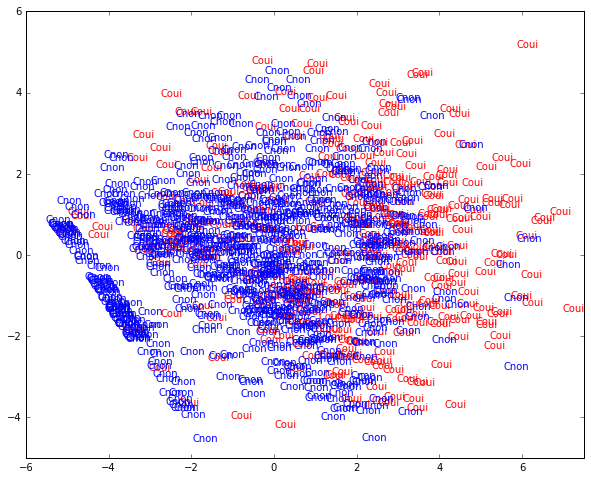

In [24]:
plt.figure(figsize=(10,8))
for i, j, nom in zip(C[:,0], C[:,1], visatrans['CARVP']):
    color = "red" if nom == "Coui" else "blue"
    plt.text(i, j, nom, color=color)
plt.axis((-6,7.5,-5,6))  
P.show()

Puis la représentation des variables:

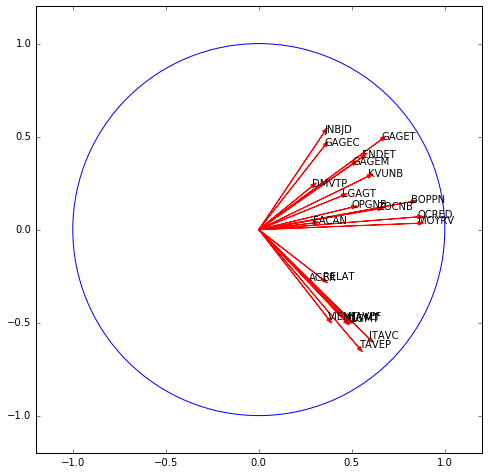

In [25]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
P.show()

Nous ne revenons pas ici sur ces résultats et leur interprétation détaillées dans les travaux de 4ème année.

#### Etape AFCM:



In [26]:
#Recodage des variables 
import random
#visapremv=visatrans2
visapremv=visatrans3

Tout d'abord on **recode** les **variables qualitatives** avec notamment des **problèmes de fréquence par modalité**.

In [27]:
#-- Regroupement de classes et recodages --#
# Remplacement de la modalité Finc aléatoirement par les deux autres modalité de FAMIQ (Fseu et Fcou) 
def rep_fami(x):
    if random.random()<0.45:
        x="Fseu"
    else:
        x="Fcou"
    return x
visapremv["FAMIQ"]=[x if x!="Finc" else rep_fami(x) for x in visapremv["FAMIQ"]]

On rend qualitatives des variables quantitatives d'intérêt: 

In [28]:
kvunbq = ["K0" if x in [0,1] else "K1" for x in visapremv["KVUNB"] ]
visapremv["KVUNBQ"]=pd.Categorical(kvunbq,ordered=False)

vienbq = ["V0" if x==0 else "V1" for x in visapremv["VIENB"]]
visapremv["VIENBQ"]=pd.Categorical(vienbq,ordered=False)

uemnbq = ["U0" if x==0 else "U1" if x==1 else "U2" for x in visapremv["UEMNB"] ]
visapremv["UEMNBQ"]=pd.Categorical(uemnbq,ordered=False)

xlgnbq = ["X0" if x==0 else "X1" if x==1 else "X2" for x in visapremv["XLGNB"] ]
visapremv["XLGNBQ"]=pd.Categorical(xlgnbq,ordered=False)

ylvnbq = ["Y0" if x==0 else "Y1" if x==1 else "Y2" for x in visapremv["YLVNB"] ]
visapremv["YLVNBQ"]=pd.Categorical(ylvnbq,ordered=False)

zocnbq = ["Z0" if x ==0 else "Z1" for x in visapremv["ZOCNB"] ]
visapremv["ZOCNBQ"]=pd.Categorical(zocnbq,ordered=False)

nptagq = ["N0" if x ==0 else "N1" for x in visapremv["NPTAG"] ]
visapremv["NPTAGQ"]=pd.Categorical(nptagq,ordered=False)

In [29]:
def rec(df,col_name,a,b):
    colq = [b if x>0 else a for x in df[col_name]]
    return colq

visapremv["ENDETQ"]=pd.Categorical(rec(visapremv,"ENDET","E0","E1"),ordered=False)
visapremv["GAGETQ"]=pd.Categorical(rec(visapremv,"GAGET","G0","G1"),ordered=False)
visapremv["FACANQ"]=pd.Categorical(rec(visapremv,"FACAN","F0","F1"),ordered=False)
visapremv["LGAGTQ"]=pd.Categorical(rec(visapremv,"LGAGT","L0","L1"),ordered=False)
visapremv["HAVEFQ"]=pd.Categorical(rec(visapremv,"HAVEF","H0","H1"),ordered=False)

In [30]:
# On passe les variables quantitatives continues  en qualitatif en coupant aux quantiles 
# on prend de côté les variable quantitative continues à "qualitatifier"
visapremw=visapremv[["AGER","RELAT","QSMOY","OPGNB","MOYRV","TAVEP","DMVTP","BOPPN","ITAVC","JNBJD"]]

In [31]:
visapremw["AGEQ"]=pd.qcut(visapremw.AGER,3,labels=["A0","A1","A2"])
visapremw["RELATQ"]=pd.qcut(visapremw.RELAT,3,labels=["R0","R1","R2"])
visapremw["QSMOYQ"]=pd.qcut(visapremw.QSMOY,3,labels=["Q0","Q1","Q2"])
visapremw["MOYRVQ"]=pd.qcut(visapremw.MOYRV,3,labels=["M0","M1","M2"])
visapremw["TAVEPQ"]=pd.qcut(visapremw.TAVEP,3,labels=["T0","T1","T2"])
visapremw["DMVTPQ"]=pd.qcut(visapremw.DMVTP,3,labels=["D0","D1","D2"])
visapremw["BOPPNQ"]=pd.qcut(visapremw.BOPPN,3,labels=["B0","B1","B2"])
visapremw["ITAVCQ"]=pd.qcut(visapremw.ITAVC,3,labels=["I0","I1","I2"])

# suppression des variables devenues inutiles
listeVarSup=["AGER","RELAT","QSMOY","MOYRV","TAVEP","DMVTP","BOPPN","ITAVC"]
visapremw.drop(listeVarSup,inplace=True,axis=1)

In [32]:
# Problème pour deux variables avec beaucoup de 0
#Source : http://stackoverflow.com/questions/20158597/how-to-qcut-with-non-unique-bin-edges
import pandas.core.algorithms as algos
mx = np.ma.masked_equal(visapremw.JNBJD.as_matrix(), 0, copy=True)
bina = algos.quantile(visapremw.JNBJD.as_matrix()[~mx.mask], np.linspace(0, 1, 3))
bina = np.insert(bina, 0, 0)
bina[1] = bina[1]-(bina[1]/2)
result = pd.tools.tile._bins_to_cuts(visapremw.JNBJD.as_matrix(), bina, include_lowest=True)
visapremw["JNBJDQ"]=pd.cut(visapremw.JNBJD,bins=bina,labels=["J0","J1","J2"])
visapremw["JNBJDQ"]=visapremw["JNBJDQ"].fillna('J0')

mx = np.ma.masked_equal(visapremw.OPGNB.as_matrix(), 0, copy=True)
bina = algos.quantile(visapremw.OPGNB.as_matrix()[~mx.mask], np.linspace(0, 1, 3))
bina = np.insert(bina, 0, 0)
bina[1] = bina[1]-(bina[1]/2)
result = pd.tools.tile._bins_to_cuts(visapremw.JNBJD.as_matrix(), bina, include_lowest=True)
visapremw["OPGNBQ"]=pd.cut(visapremw.OPGNB,bins=bina,labels=["O0","O1","O2"])
visapremw["OPGNBQ"]=visapremw["OPGNBQ"].fillna('O0')

del visapremw["OPGNB"]
del visapremw["JNBJD"]

In [33]:
fram=[visapremv,visapremw]
visapremvw=pd.concat(fram,1)

On obtient donc le jeu de données correspondant à celui résultant de l'execution du script R **`visa_code.R`** avec pour seul différence l'absence des deux variables "sexer" et "familr" qui correspondent à la version "quantitative" du sexe et du statut familial (dont nous ne nous intéressons bien entendu pas à cette étape, et que nous intégrerons utltérieurement).

On donne ses dimensions et le nom des variables considérées: à noter que les variables quantitatives recodées en facteurs qualitatifs se voient imputées d'un "Q".

In [34]:
print("Noms des variables à disposition: {var}".format(var=visapremvw.columns.values))
print("Dimensions de la table: {taille}".format(taille=visapremvw.shape))

Noms des variables à disposition: ['SEXEQ' 'FAMIQ' 'PCSPQ' 'RELAT' 'AGER' 'OPGNB' 'MOYRV' 'TAVEP' 'ENDET'
 'GAGET' 'GAGEC' 'GAGEM' 'KVUNB' 'QSMOY' 'QCRED' 'DMVTP' 'BOPPN' 'FACAN'
 'LGAGT' 'VIENB' 'VIEMT' 'UEMNB' 'XLGNB' 'XLGMT' 'YLVNB' 'YLVMT' 'ZOCNB'
 'NPTAG' 'ITAVC' 'HAVEF' 'JNBJD' 'CARVP' 'KVUNBQ' 'VIENBQ' 'UEMNBQ'
 'XLGNBQ' 'YLVNBQ' 'ZOCNBQ' 'NPTAGQ' 'ENDETQ' 'GAGETQ' 'FACANQ' 'LGAGTQ'
 'HAVEFQ' 'AGEQ' 'RELATQ' 'QSMOYQ' 'MOYRVQ' 'TAVEPQ' 'DMVTPQ' 'BOPPNQ'
 'ITAVCQ' 'JNBJDQ' 'OPGNBQ']
Dimensions de la table: (1063, 54)


In [34]:
import mca
#-- tableau disjonctif complet des variables qualitatives --#
D=mca.dummy(visapremvw.select_dtypes(include=[pd.Categorical,"object"]))
mct=mca.mca(D,cols=["FAMIQ","SEXEQ","PCSPQ","AGEQ","RELATQ"],benzecri=False)
DD=D.drop(["FAMIQ","SEXEQ","PCSPQ","AGEQ","RELATQ"],axis=1)

ImportError: No module named mca

On représente toutes ces variables (qualitatives, et "quantitatives" recodée en qualitatives) dans le premier plan de l'AFCM avec les individus:

In [3]:
#-- AFCM de toutes les variables qualitatives --#
mca_comp=mca.mca(D,benzecri=False)
fig = plt.figure(1, figsize=(15, 13))
# graphe des individus et des modalités
for i, j, nom in zip(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],D.columns.get_level_values(1)):
    #print(nom,i,j)
    plt.text(i, j, nom,color='g')
plt.scatter(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],marker='1',c='g')
plt.scatter(mca_comp.fs_r()[:, 0],-mca_comp.fs_r()[:, 1],marker='+',c='b')
P.show()

NameError: name 'mca' is not defined

## Réarangement final des variables:

Pour obtenir des tables similaires à celles utilisées dans le scénario R (pour pouvoir ensuite mener une comparaison assez "rigoureuse" des deux langages), nous faisons ici quelques dernières retouches à nos jeux de données.

La table **`vispremv`** de R contient:
* les variables quantitatives
* les variables qualitatives (d'origine ET transformées)
* la variable cible CARVP

On effectue donc les dernières modifications:

In [35]:
quant=visapremvw.select_dtypes(include=["int32","float","int64"]).columns.values
qual1=visapremvw[["SEXEQ",  "FAMIQ", "PCSPQ"]]
vari=["KVUNBQ", "VIENBQ","UEMNBQ","XLGNBQ", "YLVNBQ", "ZOCNBQ", "NPTAGQ", "ENDETQ", "GAGETQ","FACANQ", "LGAGTQ", "HAVEFQ", "AGEQ", "RELATQ", "QSMOYQ", "MOYRVQ","TAVEPQ", "DMVTPQ", "BOPPNQ", "ITAVCQ", "JNBJDQ", "OPGNBQ"]

nomcolonnes=np.concatenate((quant, ["SEXEQ",  "FAMIQ", "PCSPQ"]))
nomcolonnes=np.concatenate((nomcolonnes, vari))
nomcolonnes=np.concatenate((nomcolonnes, ["CARVP"]))

visapremvfinale=visapremvw[nomcolonnes]

On donne les dimensions et noms de variable de cette table équivalente à  **`vispremv`**.

In [36]:
print("Noms des variables à disposition: {var}".format(var=visapremvfinale.columns.values))
print("Dimensions de la table: {taille}".format(taille=visapremvfinale.shape))

Noms des variables à disposition: ['RELAT' 'AGER' 'OPGNB' 'MOYRV' 'TAVEP' 'ENDET' 'GAGET' 'GAGEC' 'GAGEM'
 'KVUNB' 'QSMOY' 'QCRED' 'DMVTP' 'BOPPN' 'FACAN' 'LGAGT' 'VIENB' 'VIEMT'
 'UEMNB' 'XLGNB' 'XLGMT' 'YLVNB' 'YLVMT' 'ZOCNB' 'NPTAG' 'ITAVC' 'HAVEF'
 'JNBJD' 'SEXEQ' 'FAMIQ' 'PCSPQ' 'KVUNBQ' 'VIENBQ' 'UEMNBQ' 'XLGNBQ'
 'YLVNBQ' 'ZOCNBQ' 'NPTAGQ' 'ENDETQ' 'GAGETQ' 'FACANQ' 'LGAGTQ' 'HAVEFQ'
 'AGEQ' 'RELATQ' 'QSMOYQ' 'MOYRVQ' 'TAVEPQ' 'DMVTPQ' 'BOPPNQ' 'ITAVCQ'
 'JNBJDQ' 'OPGNBQ' 'CARVP']
Dimensions de la table: (1063, 54)


## Construction des échantillon d'apprentissage et de test

Maintenant que nos données sont à la forme souhaitée, découpons maintenant nos données en deux échantillon: 

* un **échantillon d'apprentissage**, qui sera utilisé, comme son nom l'indique, pour "apprendre" les différents modèles que nous étudierons
* un **échantillon test**, qui sera utilisé afin de pouvoir comparer les performances des différentes familles de modèle. Ce dernier sera composé de **200** individus. 

In [37]:
from sklearn.model_selection import train_test_split
X = visapremvfinale[np.arange(53)]
Y = visapremvfinale.CARVP
X_train_tot,X_test_tot,Y_train,Y_test=train_test_split(X,Y,test_size=200,random_state=157)

Les dimensions de chaque échantillon (en distanguant la réponse CARVP des prédicteurs):

In [38]:
print("Dimension ech. app. (predicteurs) : {taille}".format(taille=X_train_tot.shape))
print("Dimension ech. test (predicteurs) : {taille}".format(taille=X_test_tot.shape))
print("Dimension ech. app. (réponse) : {taille}".format(taille=Y_train.shape))
print("Dimension ech. test (réponse) : {taille}".format(taille=Y_test.shape))

Dimension ech. app. (predicteurs) : (863, 53)
Dimension ech. test (predicteurs) : (200, 53)
Dimension ech. app. (réponse) : (863,)
Dimension ech. test (réponse) : (200,)


Les dimensions semblent correctes.

Nous allons en réalité créer deux jeux de données concernant les prédicteurs, un premier composé des **prédicteurs quantitatifs**, et un second composé des **prédicteur qualitatifs**. 

In [39]:
#-- les variables qualitatives --#
var = X_train_tot.columns.values
varqual = var[28:53]
#-- Extraction du premier jeu de données composé des var. qualitatives --#
X_train_1 = X_train_tot[varqual]
X_test_1 = X_test_tot[varqual]

In [40]:
print("Dimension ech. app. (predicteurs qualitatifs) : {taille}".format(taille=X_train_1.shape))
print("Dimension ech. test (predicteurs qualitatifs) : {taille}".format(taille=X_test_1.shape))

Dimension ech. app. (predicteurs qualitatifs) : (863, 25)
Dimension ech. test (predicteurs qualitatifs) : (200, 25)


Les fonction de scikit-learn **n'acceptant pas les variables avec des modalités codées en string**, nous recodons donc ces variables en considérons les indicatrices liées à chacune des modalités:

In [41]:
#-- obtention des indicatrices associées à chacunes des modalités 
X_train = pd.get_dummies(X_train_1)
X_test = pd.get_dummies(X_test_1)

In [42]:
print("Dimension ech. app. (predicteurs qualitatifs) recodé : {taille}".format(taille=X_train.shape))
print("Dimension ech. test (predicteurs qualitatifs) recodé : {taille}".format(taille=X_test.shape))

Dimension ech. app. (predicteurs qualitatifs) recodé : (863, 66)
Dimension ech. test (predicteurs qualitatifs) recodé : (200, 66)


Ce jeu de données est maintenant fin prêt. 
Construisons à présent celui comportant les prédicteurs quantitatifs.

Recondons tout d'abord les variables **SEXEQ** et **FAMIQ**, qui peuvent être également considérées comme des variables quantitatives.

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
le = preprocessing.LabelEncoder()

#-- Recodage pour éch. d'app. --#
sexer =   le.fit_transform(X_train_tot.SEXEQ) 
familr = le.fit_transform(X_train_tot.FAMIQ)

#-- Recodage pour éch. de test. --#
sexer_t = le.fit_transform(X_test_tot.SEXEQ) #axis = 0
familr_t = le.fit_transform(X_test_tot.FAMIQ)

In [44]:
#-- Les variables quantitatives --#
varquant=var[0:27]
#-On extrait le jeu de données qui nous interesse --#
X_trainqn=X_train_tot[varquant]
X_testqn=X_test_tot[varquant]
#-- On rajoute les deux variables sexer et familr --#
X_trainqn["sexer"] = sexer
X_trainqn["familr"] = familr
X_testqn["sexer"] = sexer_t
X_testqn["familr"] = familr_t

In [45]:
print("Dimension ech. app. (predicteurs quantitatifs) recodé : {taille}".format(taille=X_trainqn.shape))
print("Dimension ech. test (predicteurs quantitatifs) recodé : {taille}".format(taille=X_testqn.shape))

Dimension ech. app. (predicteurs quantitatifs) recodé : (863, 29)
Dimension ech. test (predicteurs quantitatifs) recodé : (200, 29)


Nous avons donc obtenu nos deux jeux de données:

* ** X_train** composé de **25** prédicteurs qualitatifs (en réalité de 66 indicatrices correspondant aux modalités)
* **X_trainqn** composé de **29** prédicteurs quantitatifs 

Et suivant les même notation on obtient les échantillons de test **X_test** et **X_testqn**. 

Les échantillons de d'apprentissage et de test pour la variables réponses sont nommé **Y_train** et **Y_test** respectivement.

## Regression logistique 

La première famille de modèles que nous allons étudier ici sera la **régression logistique**.

A l'instar du code réalisé sous R, nous utiliserons ici dans un premier temps **uniquement nos prédicteurs qualitatifs** (ie. le jeu de données "X_train"). Cette étude sera ensuite testée sur les prédicteurs quantitatifs.
A noter que le découpage en classes des variables quantitatives du jeu de données X_train entraine une réduction du nombre de degrés de liberté du modèle. Celui-ci restera toute fois linéaire.

Nous utiliserons ici la fonction de lien $logit(\pi)=\frac{\pi}{1 - \pi}$ (ou $\pi$ est la probabilité d'apparition de la modilité "COUI"), et l'on considère donc le modèle:

$\frac{\pi}{1 - \pi} = X \beta $ ou X est la matrice composée de nos prédicteurs.

### Estimation

#### Estimation du modèle complet sans interactions:

Condidérons tout d'abord le **modèle complet sans interactions** (ie. toutes les variables considérées sont prises en compte): 

Pour cela, afin d'obtenir des sorties similaires à celles de R, nous utiliserons dans ce cas le package statmodels dans un premier temps.

In [46]:
import statsmodels.api as sm

Les packages utilisé nécessite un **codage en 0 et 1** de la réponse CARVP: 

In [47]:
#-- On crée une version integer de Y_train et Y_test --#
Yb_train = le.fit_transform(Y_train)
Yb_test = le.fit_transform(Y_test)

In [48]:
monModel = sm.GLM(Yb_train, sm.tools.tools.add_constant(X_train), family=sm.families.Binomial(sm.genmod.families.links.logit))
monModel_results = monModel.fit() 

On peut donc obtenir un tableau donnant entre autre les coefficients $\beta_i$ **estimés du modèle** et leur significativité:

In [49]:
print(monModel_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  863
Model:                            GLM   Df Residuals:                      821
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -300.27
Date:                Wed, 14 Dec 2016   Deviance:                       600.54
Time:                        16:11:33   Pearson chi2:                     873.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1218      0.034     -3.621      0.000        -0.188    -0.056
SEXEQ_Shom     0.6008      0.125      4.818      0.0

La colonne `coef` nous donne la valeur des coefficients estimmé par maximisation de la log-vraisemblance par l'algorithme de Newton-Raphson et la colonne `Pr>|z|` la p-valeur du test de Wald de significativité de chaqun des paramètres (`Z` étant la statistique de test associée).



Cependant **l'intreprétation est ici compliquée** du fait que nous utilisons les indicatrices de chaque modalité de chaque variable. 

Estimons à titre indicatif **l'erreur de prévision sur l'échantillon test** de ce modèle complet:  

In [50]:
pred=monModel_results.predict(sm.tools.tools.add_constant(X_test))
pred = le.fit_transform(pred>0.5) # On prédit 1 quand l'estimation de pi_i est >0.5 (0 sinon)
pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit'])

Prédit,0,1
Observés,,
0,118,14
1,22,46


#### Recherche du paramètre optimal:

Comme il est impossible avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="R"/></a> (que nous allons désormais utiliser) de faire de la sélection de modèles via le critère d'Akkaïke nous allons considèrer des modèles pénalisés:

* Des modèles de regression Lasso (pénalité de type L1)
* Des modèles de regression ridge (pénalité de type L2)

La **pénalisation Lasso** tout d'abord donc: 

Nous cherchons le coefficient de pénalisation $\lambda$ (ici $C= \frac{1}{\lambda})$ optimal par validation croisée:

In [51]:
#-- Importation des librairies --#
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [52]:
#-- Notre grille de paramètres --#
param=[{"C":[0.01, 0.5, 5, 7, 8,  10, 15, 20]}]
#-- Recherche du "C" optimal par validation croisée sur la grille --#
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=5,n_jobs=-1)
logitOpt = logit.fit(X_train, le.fit_transform(Y_train))
#-- parametre optimal de complexite --#
logitOpt.best_params_["C"]

8

Estimons donc maintenant notre modèle optimal, observons ses coefficients et estimons son erreur sur l'échantillon test.

In [53]:
#-- Estimation du modèle optimal et erreur sur l'échantillon test --#
coefPenal = logitOpt.best_params_["C"]
logit = LogisticRegression(C=coefPenal, penalty="l1")


#-- On fit le modèle --#
logitFit = logit.fit(X_train, Yb_train)

Les coefficients du modèle:

In [54]:
logitFit.coef_ 

array([[ 0.08217281, -1.22681033, -0.22550905,  0.        ,  1.06534485,
         0.        ,  1.4067708 , -1.51489013, -0.17247602, -0.37262887,
         0.80895212, -0.33881978,  0.        , -0.2673802 ,  0.        ,
         0.8035818 ,  0.        ,  0.05481075, -0.22879337,  0.57985985,
        -0.07897183,  0.        , -0.29821424,  0.        ,  0.        ,
        -0.92384691,  0.        , -0.83397242, -0.83687648,  0.        ,
        -0.63849158,  0.        ,  0.        , -0.02941018, -0.20725026,
         0.        ,  0.        ,  0.22047714, -0.00470474,  0.94718571,
         0.        , -0.25868241,  0.13851614, -0.61480602,  0.        ,
        -0.74625623,  0.        ,  1.82483414,  0.58211965, -0.1374453 ,
         0.        , -0.07593698,  0.        ,  1.23772845,  0.85463676,
         0.        , -0.18392605, -0.97043761,  0.        ,  0.08742743,
        -0.3144421 ,  0.        ,  0.10723398, -0.50077421,  0.        ,
         0.17198302]])

On remarque la présence de "0": le modèle est bien plus parcimonieux et une selection de variables a eu lieu.

Et enfin on détermine l'erreur de prévision sur l'échantillon test 

In [55]:
#-- Erreur de test --#
print("Err. de test {Err}".format(Err=(1-logitFit.score(X_test, Yb_test))))


Err. de test 0.185


In [56]:
pred=logitFit.predict(X_test)
pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit']) 

Prédit,0,1
Observés,,
0,118,14
1,23,45


Notre modèle nous donne environ **18%** d'erreur après apprentissage sur l'échantillon test (soit **36 mal classés**). Ce qui est légérement mieux que précédement avec le modèle complet.

Explorons maintenant des modèles de **pénalisation Ridge** (pénalisation de type L2) en suivant la même démarche que précedemment: 

In [57]:
#-- Notre grille de paramètres --#
param=[{"C":[0.01, 0.1, 0.5, 1, 3, 5, 7, 8,  10, 15]}]
#-- Recherche du "C" optimal par validation croisée sur la grille --#
logitRidge = GridSearchCV(LogisticRegression(penalty="l2"), param,cv=5,n_jobs=-1)
logitRidgeOpt = logitRidge.fit(X_train, Yb_train)
#-- parametre optimal de complexite --#
logitRidgeOpt.best_params_["C"]

5

In [58]:
#-- Estimation du modèle optimal et erreur sur l'échantillon test --#
coefPenal = logitOpt.best_params_["C"]
typePenal="l2"
nproc=-1
logitRidge = LogisticRegression(C=coefPenal, penalty="l2")


#-- On fit le modèle --#
logitRidgeFit = logitRidge.fit(X_train, Yb_train)

Les coefficients: l'**interprétation sera plus difficile dans le cadre de la pénalisation de type L1** car contrairement à la regression Lasso on a pas de "séléction" de variables.

In [59]:
print(logitRidgeFit.coef_)

[[ 0.59730118 -0.71518213 -0.17521033  0.05732938  0.88499418 -0.18310424
   1.22450155 -1.67778533 -0.36648711 -0.65386088  0.53597993 -0.23303071
   0.11514976 -0.52102873 -0.21322577  0.61637355  0.03505387  0.0741234
  -0.22705822  0.39340628 -0.29197795 -0.21930928 -0.21659142  0.09871047
   0.40702243 -0.52490339  0.36269605 -0.480577   -0.48348391  0.36560296
  -0.38178541  0.26390446 -0.03905875 -0.0788222  -0.16244614  0.04456519
  -0.11285084  0.11233048 -0.1173606   0.68065953 -0.26763709 -0.5309034
   0.26373915 -0.49725436  0.11563425 -1.14809073 -0.39830037  1.42851015
   0.41183761 -0.33500067 -0.19471789 -0.50436653 -0.42913787  0.81562344
   0.60164909 -0.26447926 -0.45505078 -0.72414867  0.25573993  0.35052778
  -0.28505196  0.02882551  0.1383455  -0.43613002  0.0674964   0.25075267]]


In [60]:
#-- Erreur de test --#
print("Err. de test {Err}".format(Err=(1-logitRidgeFit.score(X_test, Yb_test))))

Err. de test 0.185


In [61]:
vp_pred=logitRidgeFit.predict(X_test)
table=pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,0,1
Observés,,
0,118,14
1,23,45


Nous obtenons à nouveau une erreur de prévision sur l'échantillon test de **18.5 %** (37 mals classés) , soit un résultat totalement identique à celui obtenu pour le modèle complet et très similaire à ceux de la pénalisation Lasso. 

En comparaison, (à titre indicatif) à ce stade, nous obtenons 41 mal classé avec le meilleurs modèle obtenu avec le code R par minimisation du score d'Akkaike (backward choisi).

### Avec les prédicteurs quantitatifs

On reprend la même étude sur les prédicteurs quantitatifs avec la pénalisation Lasso:

In [62]:
#-- Notre grille de paramètres --#
param=[{"C":[0.01, 0.5, 5, 7, 8,  10, 15, 20]}]
#-- Recherche du "C" optimal par validation croisée sur la grille --#
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=5,n_jobs=-1)
logitOpt = logit.fit(X_trainqn, le.fit_transform(Y_train))
#-- parametre optimal de complexite --#
logitOpt.best_params_["C"]

5

In [63]:
#-- Estimation du modèle optimal et erreur sur l'échantillon test --#
coefPenal = logitOpt.best_params_["C"]
logit = LogisticRegression(C=coefPenal, penalty="l1")


#-- On fit le modèle --#
logitFit = logit.fit(X_trainqn, Yb_train)

In [64]:
#-- Erreur de test --#
print("Err. de test {Err}".format(Err=(1-logitFit.score(X_testqn, Yb_test))))
pred=logitFit.predict(X_testqn)
pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit'])

Err. de test 0.155


Prédit,0,1
Observés,,
0,119,13
1,18,50


Le résultat est bien meilleur.

### Courbe ROC

Traçons enfin la courbe ROC correspondant à notre meilleur modèle de cette section: le modèle optimal (obtenu par validation croisée) en pénalisation LASSO sur les données quantitatives. Celui-ci est preféré à la pénalisation Ridge car ce type de modèle, plus parcimonieux, est plus intérprétable. 

In [65]:
from sklearn import metrics

le = preprocessing.LabelEncoder()

Y_true = Yb_test
Y_score = logit.decision_function(X_testqn)
# note : "decision_function predict confidence scores for samples."

fpr, tpr, thresholds = metrics.roc_curve(Y_true, Y_score)

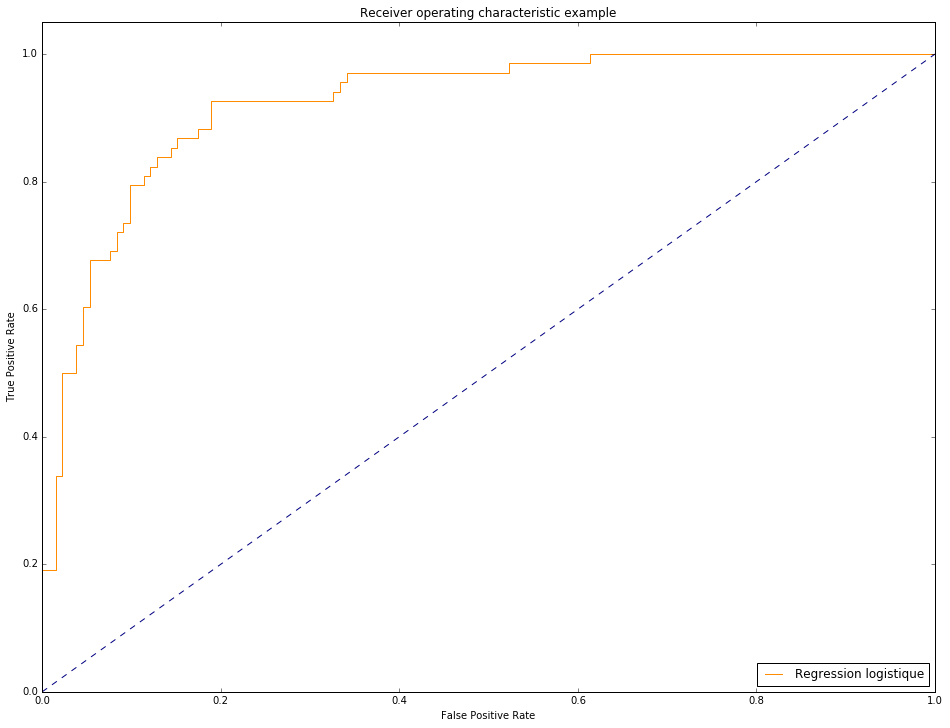

In [66]:
#import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

On donne également le score AUC associé:

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_true, Y_score)

0.92312834224598939

### Comparaison R vs Python

Pour chacune des méthodes que nous étudierons, nous donnerons à partir de maintenant:
* un comparaison des résultats vis à vis de ceux obtenus avec R 
* les différences de fonctionalités entre les deux langages

Dans le cas présent de la régression logistique, R présente deux "avantages" vis à vis de scikit-learn:
* La possibilité d'**utiliser des variables qualitatives sans avoir à passer par l'utilisation de paquets d'indicatrices** (ce qui est "mieux" en terme d'interprétabilité, d'autant plus que R offre la possibilité d'un résumé de l'information du modèle avec les coefficients du modèle et leur significativité notamment)
* La possibilité, encore pas utilisable sous scikit-learn, d'appliquer des **algorithmes de sélection de modèles** avec les algorithmes "Backward", "Stepwise" et "Forward" pour optimiser les critères AIC ou BIC par exemple 

Comme expliqué précédement nous avons du opter pour deux stratégies différentes pour les deux langages. Dans les deux cas les modèles utilisant les variables quantitatives se sont montrés les meilleurs.

Sous R nous obtenions une erreur de prévision sur l'échantillon test **comparable** à celle obtenue ici.
Cependant, nous concluerons sur les performance des méthodes principalement dans la partie "Comparaison" des méthodes à la fin de ce calepin.

## Analyse discriminante

Notre seconde famille de modèles sera **l'analyse discriminante**.

Nous allons ici considérer **trois types de méthodes**, **paramètriques ou non**:

Les deux première méthodes, paramètriques correspondent à des modèles de décision par règle Bayesienne dans le cadre d'un modèle normal.
On considère en effet que chaque observation des $p=29$ variables(que nous noterons $x$) suit un vecteur gaussien (disons $N_p(\mu_{CARVP}, \Sigma_{CARVP}) $) de dimension p conditionellement à l'appartenance à chacune des deux classe Coui et Cnon.

Ces deux modèles se distinguent par les hypothèses qu'ils considèrent:

* **analyse discriminante quadratique (paramètrique):**

Tout d'abord, l'analyse discriminante quadratique ne fait **aucune autre hypothèse**, et on considère que toutes les matrices de covariance associé à chaque vecteur gaussien sont **à priori différentes**. On estime $\mu_{CARVP}$ par la **moyenne empirique au sein de chacune des deux catégories** Coui et Cnon (1 ou 0) et $\Sigma_{CARVP}$ par la **matrice de covariance empirique correspondante**.

* **analyse discriminante linéaire (paramètrique):**

Dans ce cas on ajoute une **hypothèse d'homosédasticité** et on considère que tout les matrices de covariances sont égales.

La dernière méthode utilisée est celle, non paramétrique des **k plus proches voisins**.



Ces méthodes ne sont utilisables qu'à partir de **prédicteurs quantitatifs**.

### Estimation

Commençons par estimer nos modèles suivant les trois méthodes considérées.

Considérons tout d'abord la méthode d'**analyse discriminante linéaire**.

On considère que les probabilité $\pi_i$ associées à chacune des deux classes sont égales (par défault pas *d'a priori*).

In [68]:
#-- Importation des librairies --#
from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#-- Modèle d'analyse discriminante linéaire  --#
AD_lin = LinearDiscriminantAnalysis()
AD_linFit = AD_lin.fit(X_trainqn, Yb_train)

Puis la méthode d'**analyse discriminante quadratique** :

In [69]:
#-- Importation des librairies --#
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

AD_quad = QuadraticDiscriminantAnalysis()
AD_quadFit = AD_quad.fit(X_trainqn, Yb_train)

** Remarque:** On pourrait également tenter d'optimiser un paramètre de "shrinkage" pour ces deux types de modèles. Cela pourrait être une autre piste d'amélioration potentielle.

Et enfin la méthode non paramètrique des **k plus proches voisins**:
On cherche ici à **optimiser k** par validation croisée

In [70]:
#-- Importation des librairies --#
from sklearn.neighbors import KNeighborsClassifier

#-- Optimisation de k par validation croisée --#
param=[{"n_neighbors":list(range(1,20))}]
knn=GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
knnOpt=knn.fit(X_trainqn, Yb_train)
# paramètre optimal
knnOpt.best_params_["n_neighbors"]

14

In [71]:
nkk=knnOpt.best_params_["n_neighbors"]
n_proc=-1

#-- Le modèle optimal --#
knn = KNeighborsClassifier(n_neighbors=nkk, weights='uniform', 
        algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
        metric_params=None, n_jobs=n_proc)
knnFit=knn.fit(X_trainqn, Yb_train) 

### Taux d’erreur sur l’échantillon test 

Pour chacune des trois méthodes nous calculons les erreurs sur les échantillons test. 

In [72]:
#-- analyse discriminante linéaire --#
# Erreur de test
print("Err. de test {Err}: ".format(Err=(1- AD_linFit.score(X_testqn, Yb_test))))
# Table
pred_AD_lin = AD_lin.predict(X_testqn)
table = pd.crosstab(Yb_test, pred_AD_lin,rownames=['Observés'], colnames=['Prédit'])
table

Err. de test 0.16: 


Prédit,0,1
Observés,,
0,124,8
1,24,44


In [73]:
#-- analyse discriminante quadratique --#
# Erreur de test
print("Err. de test {Err}: ".format(Err=(1- AD_quadFit.score(X_testqn, Yb_test))))
# Table
pred_AD_quad = AD_quad.predict(X_testqn)
table=pd.crosstab(Yb_test, pred_AD_quad, rownames=['Observés'], colnames=['Prédit'])
table

Err. de test 0.19: 


Prédit,0,1
Observés,,
0,117,15
1,23,45


In [74]:
#-- K-plus proches voisins --#
# Erreur de test
print("Err. de test {Err}: ".format(Err=(1-knnFit.score(X_testqn,Yb_test))))

# Table
pred = knnFit.predict(X_testqn)
table=pd.crosstab(Yb_test, pred,  rownames=['Observés'], colnames=['Prédit'])
table

Err. de test 0.3: 


Prédit,0,1
Observés,,
0,120,12
1,48,20


On séléctionne le **modèle d'analyse discriminante linéaire**, notre "champion" de cette famille de modèle.

On remarque notamment ici que la méthode des k plus proches voisins donne de très mauvaise prévisions.

### Courbe ROC

On trace la courbe ROC pour le modèle d'analye discriminante linéaire.

On la superpose à celle obtenue pour le meilleur modèle de la famille des modèles de regression logistique.

In [75]:
Y_score2 = AD_lin.decision_function(X_testqn)
Y_score2 = AD_lin.predict_proba(X_testqn)
# note : "decision_function predict confidence scores for samples."

fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_true, Y_score2[:,1])

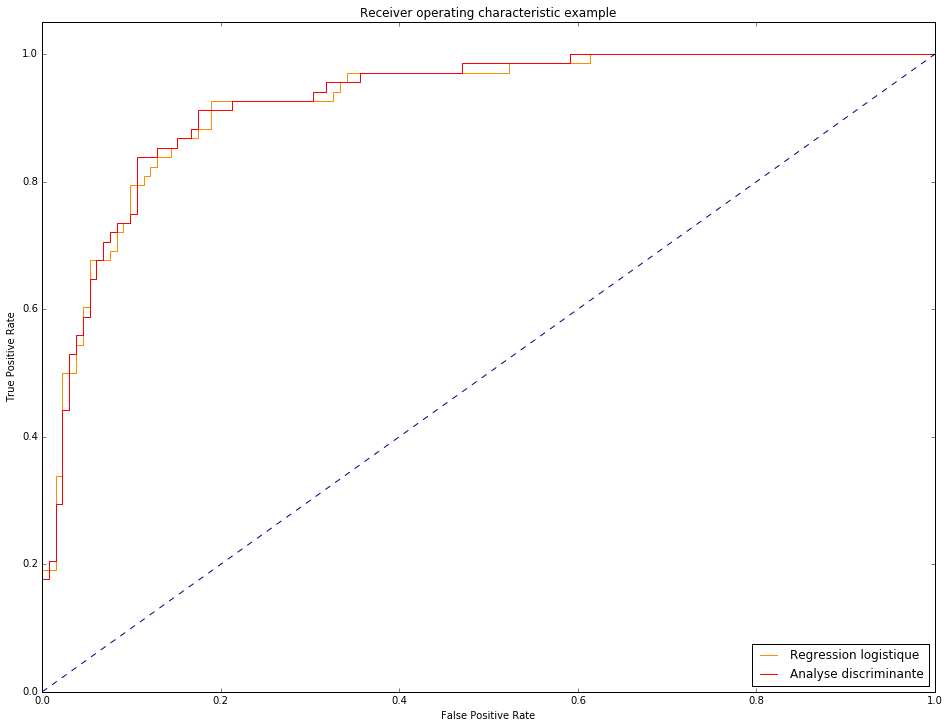

In [76]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Les deux modèles semblent assez proche sous cette perspective.

Aire sous courbe:

In [77]:
print(roc_auc_score(Y_true, Y_score)) # Regression logistique 
print(roc_auc_score(Y_true, Y_score2[:,1])) # Analyse discriminante

0.923128342246
0.92513368984


### Comparaison R vs Python

De la même manière qu'ici l'analyse discriminante linéaire est la meilleurs méthode en terme d'erreur de prévision sous R. Les k plus proches voisins obtiennent également des résultats assez mauvais.

A titre de comparaison nous obtenions avec la première méthode citée 42 mal classés contre 31 ici pour ce découpage de l'échantillon.  

En terme de fonctionalité, nous ne notons rien de particulièrement différent entre les deux languages pour cette famille de méthodes.


## Arbres binaires de décision

Considérons des arbres binaires de décision (en discrimination bien évidement).

Pour cette famille de modèle le paramètre de complexité à optimiser est le **nombre d'arbres *k* **. Pour ce faire il est en principe possible de réaliser une **procédure d'élagage** en subdivisant un arbre maximal (le plus "rafiné" possiblement réalisable) en sous arbres et en optimisant le dégré de subdivision optimal de cet arbre maximal. Cependant, **cette procédure n'est pas implémentée pour le package scikit-learn** (alors qu'elle est facilement utilisable sous R avec le package rpart par exemple).

Nous allons donc ici essayer d'optimiser la **profondeur** des arbres par validation croisée.

Nous considérerons des arbres estimés avec les deux jeux de prédicteurs, c'est à dire:

* des arbres estimés avec les prédicteurs qualitatifs 
* des arbres estimés avec les prédicteurs quantitatifs 


### Estimation avec prédicteurs qualitatifs

Commençons avec les prédicteurs qualitatifs.  

On optimise comme prévu la profondeur des arbres (`max_depth`).

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#-- Optimisation de la profondeur de l'arbre --#
param = [{"max_depth":list(range(1,20))}]
Arbre_qual = GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
Arbre_qual_opt = Arbre_qual.fit(X_train, Yb_train)
#-- paramètre optimal --#
Arbre_qual_opt.best_params_["max_depth"]

4

**Note:** On choisi ici de considérer le **critère de Gini** (plutôt que d'entropie) comme critère d'homogénéité (utilisé notamment pour le choix des meilleurs divisions à chaque noeud).

In [79]:
#-- Arbre optimal --#
profMax=Arbre_qual_opt.best_params_["max_depth"]

#-- arbre: paramètres et options par défaut --#
Arbre_qual=DecisionTreeClassifier(criterion='gini', splitter='best', 
            max_depth=profMax, min_samples_split=2, min_samples_leaf=1, 
            min_weight_fraction_leaf=0.0, max_features=None, 
            random_state=None, max_leaf_nodes=None, class_weight=None, 
            presort=False)
Arbre_qualFit=Arbre_qual.fit(X_train, Y_train) 

#-- Estimation de l'erreur de prévision --#
print("Err. de test {Err}: ".format(Err=(1-Arbre_qualFit.score(X_test,Y_test))))

Err. de test 0.245: 


In [80]:
#-- prévision de l'échantillon test --#
pred = Arbre_qualFit.predict(X_test)
# matrice de confusion
table=pd.crosstab(Y_test,pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,Cnon,Coui
Observés,,
Cnon,116,16
Coui,33,35


Nous obtenons donc des résultats assez décevants avec les prédicteurs qualitatifs!

### Estimation avec prédicteurs quantitatifs

Réalisons la même étude mais cette fois avec nos **prédicteurs quantitatifs**:

In [81]:
#-- Optimisation de la profondeur de l'arbre --#
param=[{"max_depth":list(range(1,20))}]
Arbre_quant= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
Arbre_quant_opt = Arbre_quant.fit(X_trainqn, Yb_train)
#-- paramètre optimal --#
Arbre_quant_opt.best_params_["max_depth"]

9

In [82]:
#-- Arbre "optimal" --#
profMax=Arbre_quant_opt.best_params_["max_depth"]
#-- arbre: paramètres et options par défaut --#
Arbre_quant=DecisionTreeClassifier(criterion='gini', splitter='best', 
            max_depth=profMax, min_samples_split=2, min_samples_leaf=1, 
            min_weight_fraction_leaf=0.0, max_features=None, 
            random_state=None, max_leaf_nodes=None, class_weight=None, 
            presort=False)
Arbre_quantFit=Arbre_quant.fit(X_trainqn, Y_train) 
#-- Estimation de l'erreur de prévision --#
print("Err. de test: {Err} ".format(Err=(1-Arbre_quantFit.score(X_testqn,Y_test))))

Err. de test: 0.13 


In [83]:
#-- prévision de l'échantillon test --#
pred = Arbre_quantFit.predict(X_testqn)
#-- matrice de confusion --#
table=pd.crosstab(Y_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,Cnon,Coui
Observés,,
Cnon,124,8
Coui,18,50


Les résultats sont bien meilleurs avec ces prédicteurs!

### Autres critères à optimiser

Nous avons ici choisi d'optimiser la profondeur de l'arbre, mais nous aurions aussi pu nous baser sur d'autres critères, comme par exemple la **taille minimum de l'échantillon contenu dans chaque noeud**.

Essayons cette autre approche sur nos prédicteurs quantitatifs, à priori plus appropriés: 

In [84]:
#-- Optimisation de la profondeur de l'arbre --#
param=[{"min_samples_leaf":list(range(1,20))}]
Arbre_quant_taille= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
Arbre_quant_taille_opt = Arbre_quant_taille.fit(X_trainqn, Yb_train)
#-- paramètre optimal --#
Arbre_quant_taille_opt.best_params_["min_samples_leaf"]

7

In [85]:
#-- Arbre "optimal" --#
TailleMin=Arbre_quant_taille_opt.best_params_["min_samples_leaf"]
#-- arbre: paramètres et options par défaut --#
Arbre_quant_taille=DecisionTreeClassifier(criterion='gini', splitter='best', 
            min_samples_split=2, min_samples_leaf=TailleMin, 
            min_weight_fraction_leaf=0.0, max_features=None, 
            random_state=None, max_leaf_nodes=None, class_weight=None, 
            presort=False)
Arbre_quant_tailleFit=Arbre_quant_taille.fit(X_trainqn, Y_train) 
#-- Estimation de l'erreur de prévision --#
print("Err. de test: {Err} ".format(Err=(1-Arbre_quant_tailleFit.score(X_testqn,Y_test))))

Err. de test: 0.125 


In [86]:
#-- prévision de l'échantillon test --#
pred = Arbre_quant_tailleFit.predict(X_testqn)
#-- matrice de confusion --#
table=pd.crosstab(Y_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,Cnon,Coui
Observés,,
Cnon,125,7
Coui,18,50


On obtient des résultats similaires.
Notons d'ailleurs que le **taux de faux négatifs est très élevé**!

### Courbe ROC

Concluons en traçant une nouvelle fois notre courbe ROC correspondant au modèle établi à partir des prédicteurs quantitatifs par optimisation de la profondeur maximale.

In [87]:
Y_score3 = Arbre_quant.predict_proba(X_testqn)[:, 1]
# note : "decision_function predict confidence scores for samples."

fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_true, Y_score3)

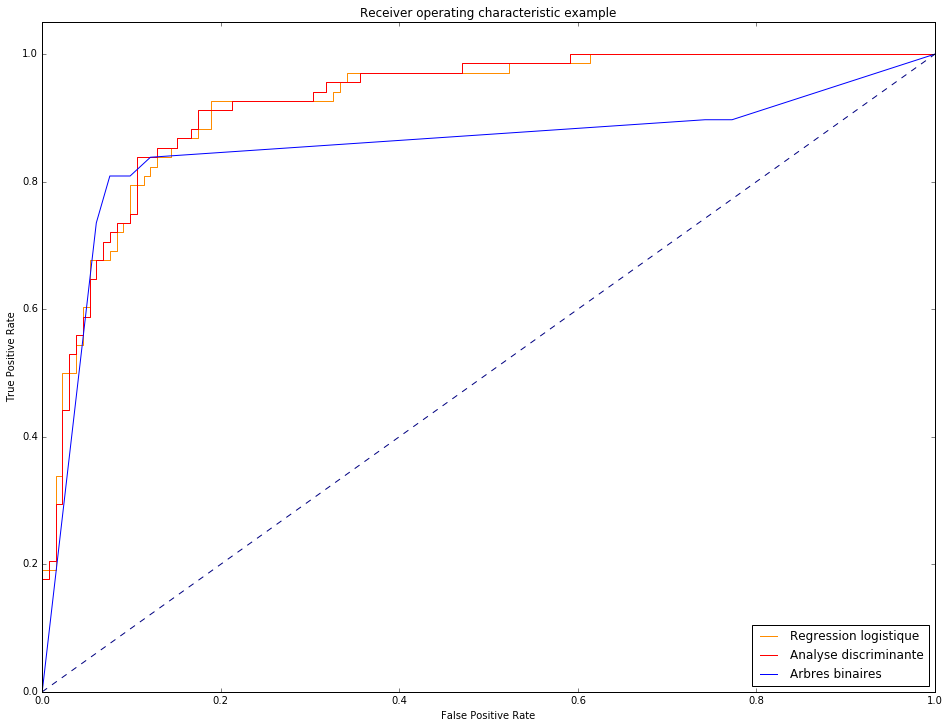

In [88]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')
plt.plot(fpr3, tpr3, color='blue', label='Arbres binaires')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Grâce à cette représentation on peut de nouveau constater que le taux de faux négatif est élevé.

**Aires sous courbe:**

In [89]:
print(roc_auc_score(Y_true, Y_score)) # Regression logistique 
print(roc_auc_score(Y_true, Y_score2[:,1])) # Analyse discriminante
print(roc_auc_score(Y_true, Y_score3)) # Arbres binaires de décision

0.923128342246
0.92513368984
0.852829768271


### Comparaison R vs Python

Nous notons ici un manque notable dans l'implémentation des arbres de binaires de décision par le package scikit-learn: l'**absence de procédure d'élagage**("pruning"). Nous avons du ici optimiser simplement la profondeur de chaque arbre. 

## Agregation de modèles 

Nous allons dans cette partie nous intéresser à différentes méthodes d'aggrégation de modèles.

Deux d'entre elles (le **bagging** et les **Random Forest**, la seconde étant une version "aléarisées" de la première) sont des méthodes de constructions aléatoires de familles de modèles, tandis que la dernière (le **boosting**) est un méthode adaptative. 

Nous utiliserons ici en pratique des **aggrégations d'abre de décision**, des modèles assez instables (pas d'intêret d'aggréger des modèles stables comme pour la régression logistiques par exemple).

### Bagging

Dans le cadre du bagging, tout d'abord, on tire $B$ fois des échantillons boostraps sur lesquels on estime à chaque itération un arbre de décision (donc B en tout).

Une moyennes des probabilités de l'appartenance à l'une ou l'autre des modalités obtenues à l'extremité de chaque arbre (feuille) est finalement calculée pour associer une observation à une classe.

Nous allons ici utiliser, de la même manière que dans le code R, successivement:

* les prédicteurs quantitatifs uniquement
* les prédicteurs qualitatifs uniquement

#### Estimation

In [90]:
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier

Pour chaque modèle nous allons déterminer son **erreur  *out of bag* **. 

Celle-ci correspond, pour chaque observation à "predire" (dans un premier temps de l'échantillon d'apprentissage) uniquement par rapport aux arbres de la famille construits sur des échantillons boostraps ne comprenant ** *pas* ** cette observation.  

Nous pouvons choisir le nombre d'estimateurs (ie d'arbres, et donc le nombre $B$ d'échantillon boostraps correspondants) à utiliser (10 par défault). 

Il est choisi ici de considérer des **arbres complets** (pas d'élagage ni de limitation en terme de nombre maximal de feuille). Cette aproche est celle en générale utilisée en pratique: on considère certes des estimateurs de grande variance, mais on réduit cette même variance par le principe même d'aggregation de modèle.

In [91]:
vpBag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=1, max_features=1.0, bootstrap=True, 
                          bootstrap_features=False, oob_score = True, n_jobs=-1) 

#-- Score OOB avec prédicteurs qualitatifs --#
vpBagFit = vpBag.fit(X_train, Yb_train)
score = vpBag.oob_score_
print(1-score)

0.334878331402


On obtient de mauvais résultat pour les prédicteurs qualitatifs.

On recommence donc pour les prédicteurs quantitatifs:

In [92]:
vpBagQn = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=1.0, max_features=1.0, bootstrap=True, 
                            bootstrap_features=False, oob_score = True, n_jobs=-1) 

#-- Score OOB avec prédicteurs quantitatifs --#
vpBagFitQn = vpBagQn.fit(X_trainqn, Yb_train, sample_weight=None)
1-vpBagFitQn.oob_score_

0.10660486674391656

On a testé pour différents nombres d'abres estimé et on décide de fixer ce nombre à 50.
On obtient une erreur out-of-bag bien meilleure dans ce cas!

On séléctione donc un modèle avec 50 estimateurs (ie 50 échantillons boostraps, 50 arbres) et avec les prédicteurs quantitatifs uniquement.

#### Prévision de l'échantillon test:

Ce modèle nous donne un faible erreur sur l'échantillon test.

In [93]:
pred = vpBagFitQn.predict(X_testqn)
table = pd.crosstab(Y_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,0,1
Observés,,
Cnon,125,7
Coui,11,57


#### Courbe ROC

On compare à nouveau le tracé des courbes ROC et les aires AUC.

In [94]:
Y_score4 = vpBagQn.predict_proba(X_testqn)[:, 1]
# note : "decision_function predict confidence scores for samples."

fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_true, Y_score4)

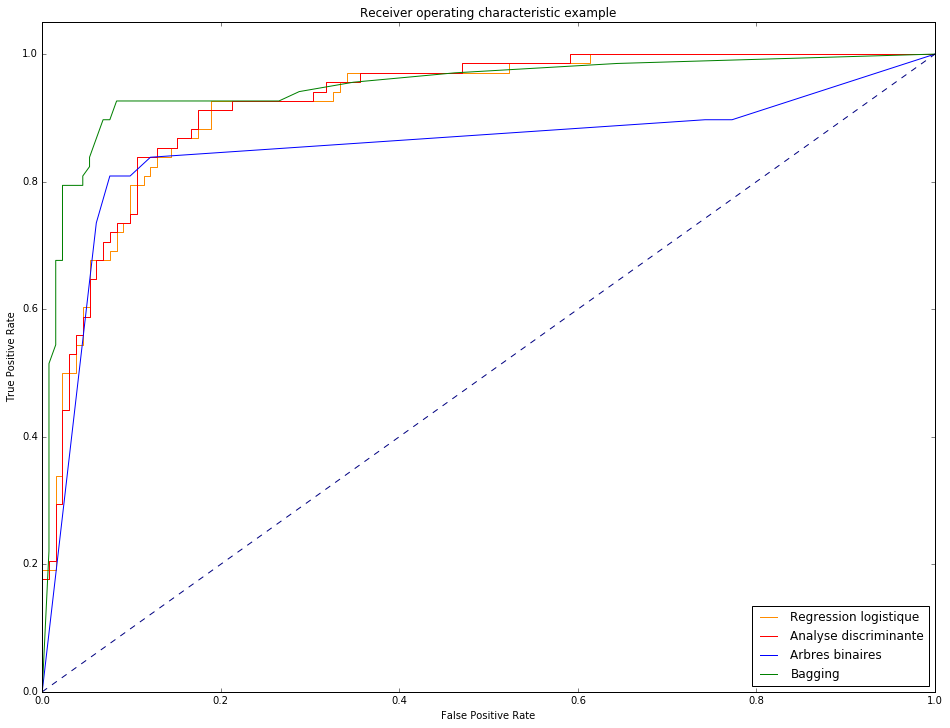

In [95]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')
plt.plot(fpr3, tpr3, color='blue', label='Arbres binaires')
plt.plot(fpr4, tpr4, color='green', label='Bagging')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [96]:
print(roc_auc_score(Y_true, Y_score)) # Regression logistique 
print(roc_auc_score(Y_true, Y_score2[:,1])) # Analyse discriminante
print(roc_auc_score(Y_true, Y_score3)) # Arbres binaires de décision
print(roc_auc_score(Y_true, Y_score4)) # Bagging

0.923128342246
0.92513368984
0.852829768271
0.948919340463


 Notons les bons résultats associés au bagging.

#### Comparaison R vs Python

Le paramétrage est ici relativement similaire à celui effectué sous R.

Nous obtenons des résultats légerement meilleurs (on dira assez similaires) sous Python que sous R (où l'on obtenenais une vingtaine de mal classés). 

De la même manière que précédement, nous trouvons qu'une nouvelles fois les prédicteurs quantitatifs donnent de meilleurs résultats dans les deux langages. 



### Boosting 

Considérons maintenant le boosting. Ce type d'aggrégation de modèle est **adaptatif**. Cela signifie qu'en plus de reduire la variance de notre estimateur en "moyennant" d'une certaine manière plusieurs estimateurs agrégé, on va en plus chercher à **réduire le biais**.

Le principe général est à chaque étape d'associer un **poids** plus important aux observations mal prédites par l'estimateur précédent.

Nous testerons ici deux types de boosting:

* l'adaptative boosting
* le "gradient boosting": dans ce cas précis on cherche à minimiser à chaque étape le gradient de la fonction de perte que l'on considère.

#### Adaptative boosting

Commençons donc par l'"adaptative boosting" dans sa forme initiale. 

On fait ici varier la **pronfondeur maximale** des arbres utilisés et le **nombre d'arbre** en observant l'erreur d'apprentissage associée:  

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
vpAdBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=20)
vpAdBoostFit = vpAdBoost.fit(X_trainqn, Y_train)

On fait varier la **pronfondeur d'arbre** (max_depth/prof) et **le nombre max d'arbre** (n_estimators)

In [99]:
1-vpAdBoostFit.score(X_trainqn, Y_train)

0.0

* **prof = 3, nb max d'arbre=20**: err. apprentissage= 0.0
* **prof = 1, nb max d'arbre=50**: err. apprentissage= 0.062572421784472754
* **prof = 1, nb max d'arbre=100**: err. apprentissage= 0.039397450753186569
* **prof = 2, nb max d'arbre=50**: err. apprentissage= 0.0

"Il  suffit  en  général  de  prendre  un  nombre  d’itérations  suffisant  au regard de la complexité des arbres : 50 à 100 pour une profondeur réduite (1), 20 à 50 pour une profondeur supérieure (3). " (ref. sujet)

Ces méthodes d'aggregation ne sont que peu sensibles au sur-apprentissage: en effet même lorsque l'erreur d'apprentissage s'annule l'erreur sur l'échantillon test reste décroissante.

A titre d'exemple donnons les erreurs sur l'échantillon test des modèles précédent (comme obtenu dans le script R proposé):

In [100]:
1-vpAdBoostFit.score(X_testqn, Y_test)

0.10499999999999998

* **prof = 3, nb max d'arbre=20**: err. test = 0.094999999999999973
* **prof = 1, nb max d'arbre=50**: err. test =  0.099999999999999978
* **prof = 1, nb max d'arbre=100**: err. test = 0.094999999999999973
* **prof = 2, nb max d'arbre=50**: err. test = 0.10499999999999998

Le cas des deux modèle avec un profondeur maximum de 1 illustre la faible sensibilité au sur-apprentissage: l'erreur de test diminue quand l'on passe de 50 à 100 itérations.


#### Gradient boosting

Dans un premier temps, considérons un modèle de gradient boosting avec les paramètres tels que définit dans le code R associé, et regardons, à titre indicatif, son erreur sur l'échantillon test associée:

On règle par défault la **profondeur maximum** à 3, la **taille minimale de chaque noeud** à 5 observations. 


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
#-- Paramètrage --#
params_0 = {'loss': 'exponential', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 1, 'min_samples_split': 1}
params_0 = {'loss': 'exponential', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}  

vpBoost_0 = GradientBoostingClassifier(**params_0)
# loss='exponential' pour algo adaboost, min_samples_split: nb mini d'observation à l'issue de chaque noeud 
# min_samples_split: le nb mini. d'obs. en fin d'abre (revoir pour être certain)
# learning_rate <--> shrinkage

#-- Ajustement du modèle --#
vpBoost_0.fit(X_trainqn, Y_train)

#-- Erreur de test --#
acc = vpBoost_0.score(X_testqn, Y_test)
print("Erreur de test: {:.4f}".format(1-acc))

Erreur de test: 0.0900


On obtient donc une erreur assez faible d'environ 8/10% pour ce modèle non optimisé.

##### Optimisation des paramètres du modèle:


Optimisons mantenant le paramètre "n_estimators" qui correspond au **nombre d'arbres** estimés.
Nous allons tout d'abord étudier des modèles sans **"shrinkage"** (ie des modèles avec le paramètre learning_rate fixé à 1), puis des modèles avec plus ou moins de shrinkage.

Le shrinkage permet la "régularisation" du modèle, c'est à dire contribue à le rendre moins sensible au sur-apprentissage. Un valeur du coefficient de shrinkage (ou "learning rate") à 1 correspond justement à une absence de shrinkage. 

Ce paramètre va, autrement dit, faire en sorte de faire converger le gradient de la fonction de perte plus ou moins vite vers son minimum. 

Pour chacun de ces modèles nous allons donc determiner par validation croisée un nombre optimal d'arbres à estimer, puis, après avoir selectionné le meilleur modèle parmi les différentes configurations de "shrinkage", nous l'appliquerons une nouvelle fois à l'echantillon test pour étudier son erreur de test et pouvoir le comparer aux familles de modèles précédement étudiées.

* **  Sans shrinkage: **

Tout d'abord règlons le "taux d'apprentissage" (learning rate) à 1, et recherchons pour cette première configuration le nombre d'arbres optimal par validation croisée:

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#-- On garde les même paramètre initiaux --#
params_0 = {'loss': 'exponential', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'min_samples_split': 1}
params_0 = {'loss': 'exponential', 'n_estimators': 30, 'max_depth': 3, 'learning_rate': 1, 'min_samples_leaf': 1, 'min_samples_split': 5} #, 'random_state': 3, , 
cv_boost = GradientBoostingClassifier(**params_0)
cv_boost.fit(X_trainqn, Yb_train)

n_estimators = params_0['n_estimators']
x = np.arange(n_estimators) + 1

#-- Fonction calculant l'erreur de test --#
# mod: le modèle considéré, X_test/Y: l'échantillon de test considéré (prédicteur/réponse)
def heldout_score(mod, Xtest, Ytest):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(mod.staged_decision_function(Xtest)): # staged_decision_function: fct dec pour chaque iteration
        score[i] = mod.loss_(Ytest, y_pred)
    return score # vecteur avec les score correspondants à chaque parametrage (ie nb d'arbre)


#-- "K-Folds" cross-validation (on prend par défault K=10) --#
# On découpes en sous échantillons de test et d'apprentissage par méthode K-fold 
# qui sont réutilisés avec la fonction au dessus 
def cv_estimate(n_splits=10):
    cv = KFold(n_splits = n_splits)
    cv_boost = GradientBoostingClassifier(**params_0)
    val_scores = np.zeros((n_estimators,), dtype=np.float64) # stocke les scores par estimateur 
    # La boucle suivante calcule l'erreur de cv
    for train, test in cv.split(X_trainqn, Yb_train): # à chaque iter on sel. l'ech de test et celui d'app. selon K-Fold cv.
        cv_boost.fit(X_trainqn.iloc[train], Yb_train[train]) # on ajuste le modèle
        val_scores += heldout_score(cv_boost, X_trainqn.iloc[test], Yb_train[test]) # on calcule le score d'erreur cumulé grâce à heldout_score
    val_scores /= n_splits # on divise par le nombre de fold de la cv pour avoir la moyenne des erreurs pour chaque estimateur
    return val_scores

cv_score = cv_estimate(10)
train_score = heldout_score(cv_boost, X_trainqn, Yb_train)

On a calculé ici et représentons sur le graph ci-dessous **l'évolution de l'erreur d'apprentissage (en noir)** et **l'erreur de validation croisée (en vert)** en fonction du nombre d'estimateur considéré:

5


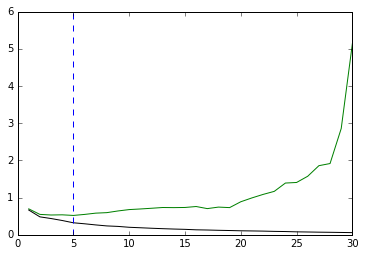

In [104]:
best_iter_0 = x[np.argmin(cv_score)]
print(best_iter_0)

plt.plot(x, cv_score, label='CV loss', color='g')
plt.plot(x, train_score, label='CV loss', color='k')
plt.axvline(x=best_iter_0, color='b', linestyle='--')

Le minimum du score de validation croisée:

In [105]:
cv_score[best_iter_0]

0.54771818250393112

Avec un "learning rate" à 0.1 maintenant:

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#-- On garde les même paramètre initiaux --#
params_0 = {'loss': 'exponential', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'min_samples_split': 1}
params_0 = {'loss': 'exponential', 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5} #, 'random_state': 3, , 
cv_boost = GradientBoostingClassifier(**params_0)
cv_boost.fit(X_trainqn, Yb_train)

n_estimators = params_0['n_estimators']
x = np.arange(n_estimators) + 1

#-- Fonction calculant l'erreur de test --#
# mod: le modèle considéré, X_test/Y: l'échantillon de test considéré (prédicteur/réponse)
def heldout_score(mod, Xtest, Ytest):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(mod.staged_decision_function(Xtest)): # staged_decision_function: fct dec pour chaque iteration
        score[i] = mod.loss_(Ytest, y_pred)
    return score # vecteur avec les score correspondants à chaque parametrage (ie nb d'arbre)


#-- "K-Folds" cross-validation (on prend par défault K=10) --#
# On découpes en sous échantillons de test et d'apprentissage par méthode K-fold 
# qui sont réutilisés avec la fonction au dessus 
def cv_estimate(n_splits=10):
    cv = KFold(n_splits = n_splits)
    cv_boost = GradientBoostingClassifier(**params_0)
    val_scores = np.zeros((n_estimators,), dtype=np.float64) # stocke les scores par estimateur 
    # La boucle suivante calcule l'erreur de cv
    for train, test in cv.split(X_trainqn, Yb_train): # à chaque iter on sel. l'ech de test et celui d'app. selon K-Fold cv.
        cv_boost.fit(X_trainqn.iloc[train], Yb_train[train]) # on ajuste le modèle
        val_scores += heldout_score(cv_boost, X_trainqn.iloc[test], Yb_train[test]) # on calcule le score d'erreur cumulé grâce à heldout_score
    val_scores /= n_splits # on divise par le nombre de fold de la cv pour avoir la moyenne des erreurs pour chaque estimateur
    return val_scores

cv_score = cv_estimate(10)
train_score = heldout_score(cv_boost, X_trainqn, Yb_train)

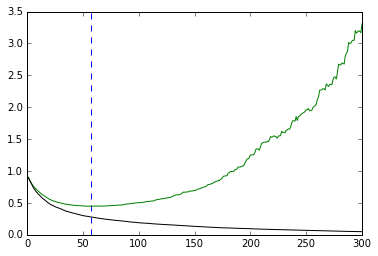

In [107]:
best_iter_1 = x[np.argmin(cv_score)]

plt.axvline(x=best_iter_1, color='b', linestyle='--')
plt.plot(x, cv_score, label='CV loss', color='g')
plt.plot(x, train_score, label='CV loss', color='k')

Le minimum du score obtenu par validation croisée: 

In [108]:
cv_score[best_iter_1]

0.44938821903266335

Et enfin avec un shrinkage de 0.01:

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#-- On garde les même paramètre initiaux --#
params_0 = {'loss': 'exponential', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1, 'min_samples_split': 1}
params_0 = {'loss': 'exponential', 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5} 
cv_boost = GradientBoostingClassifier(**params_0)
cv_boost.fit(X_trainqn, Yb_train)

n_estimators = params_0['n_estimators']
x = np.arange(n_estimators) + 1

#-- Fonction calculant l'erreur de test --#
# mod: le modèle considéré, X_test/Y: l'échantillon de test considéré (prédicteur/réponse)
def heldout_score(mod, Xtest, Ytest):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(mod.staged_decision_function(Xtest)): # staged_decision_function: fct dec pour chaque iteration
        score[i] = mod.loss_(Ytest, y_pred)
    return score # vecteur avec les score correspondants à chaque parametrage (ie nb d'arbre)


#-- "K-Folds" cross-validation (on prend par défault K=10) --#
# On découpes en sous échantillons de test et d'apprentissage par méthode K-fold 
# qui sont réutilisés avec la fonction au dessus 
def cv_estimate(n_splits=10):
    cv = KFold(n_splits = n_splits)
    cv_boost = GradientBoostingClassifier(**params_0)
    val_scores = np.zeros((n_estimators,), dtype=np.float64) # stocke les scores par estimateur 
    # La boucle suivante calcule l'erreur de cv
    for train, test in cv.split(X_trainqn, Yb_train): # à chaque iter on sel. l'ech de test et celui d'app. selon K-Fold cv.
        cv_boost.fit(X_trainqn.iloc[train], Yb_train[train]) # on ajuste le modèle
        val_scores += heldout_score(cv_boost, X_trainqn.iloc[test], Yb_train[test]) # on calcule le score d'erreur cumulé grâce à heldout_score
    val_scores /= n_splits # on divise par le nombre de fold de la cv pour avoir la moyenne des erreurs pour chaque estimateur
    return val_scores

cv_score = cv_estimate(10)
train_score = heldout_score(cv_boost, X_trainqn, Yb_train)

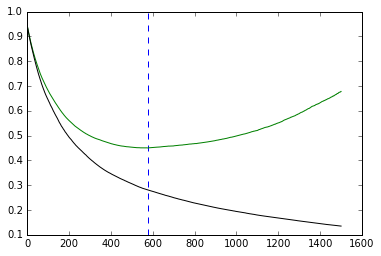

In [110]:
best_iter_2 = x[np.argmin(cv_score)]
plt.axvline(x=best_iter_2, color='b', linestyle='--')

plt.plot(x, cv_score, label='CV loss', color='g')
plt.plot(x, train_score, label='CV loss', color='k')


On observe le score par validation croisée pour la meilleur itération:

In [111]:
cv_score[best_iter_2]

0.45033602138160778

Résumons les scores par validation croisée minimum (vis à vis du nombre d'estimateur) des trois pamamètrage en terme de shrinkage précédents: 

* **learning rate = 1 (sans shrinkage):** 0.54781073429049654 (5 itérations)
* **learning rate = 0.1:** 0.44830326178527863 (57 itérations)
* **learning rate = 0.01:** 0.44996687941384705 (544 itérations)

On sélectionne a priori le second paramètrage (performances similaire en bien moins d'itération) et on évalue maintenant son **erreur de test**: 

Pour cela on crée la fonction "test_score" pour calculer (puis tracer) l'évolution de l'erreur de test en fonction du nombre d'estimateur: 

In [112]:
def test_score(mod, Xtest, Ytest, Nest):
    score = np.zeros((Nest), dtype=np.float64)
    for i, y_pred in enumerate(mod.staged_predict(Xtest)): 
        table = pd.crosstab(Yb_test, y_pred) 
        if np.in1d(1,y_pred):
            score[i] = 1- float(table[0][0] + table[1][1])/float(len(Yb_test))
        else:
            table = pd.crosstab(Yb_test, y_pred) 
            score[i] = 1- float(table[0][0])/float(len(Yb_test))
    return score 

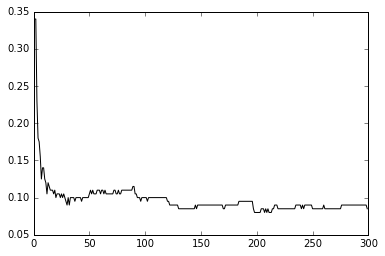

In [113]:
params_Opt = {'loss': 'exponential', 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5} 
cv_boost_Opt = GradientBoostingClassifier(**params_Opt)
cv_boost_Opt.fit(X_trainqn, Yb_train)

testscore = test_score(cv_boost_Opt, X_testqn, Yb_test, 300)

x = np.arange(300)
plt.plot(x, testscore, label='CV loss', color='k')

On remarque qu'à partir de 50 itérations environ **l'erreur de test se stabilise**.

In [114]:
cv_boost_opt = GradientBoostingClassifier(**params_Opt)
cv_boost_opt.fit(X_trainqn, Y_train)


print("Erreur de test: {:.4f}".format(1-cv_boost_opt.score(X_testqn, Y_test)))

Erreur de test: 0.0850


In [115]:
pred = cv_boost_opt.predict(X_testqn)
table = pd.crosstab(Y_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,Cnon,Coui
Observés,,
Cnon,126,6
Coui,11,57


**Remarque:** Nous avons ici tenté de reproidure la même démarche que sous R (avec les mêmes représentations graphiques), cependant il est plus rapide et facile d'utiliser la cross validation de scikit-learn (comme cela sera fait avec xgboost ci dessous).

#### Utilisation du package Xgboost

Testons une autre implémentation possible du boosting par descente de gradient avec le package **Xgboost**, utlisé régulièrement dans les concours de prédictions.

Nous utiliserons ici l'**implémentation compatible avec scikit-learn** de cet algorithme de manière à l'utiliser de manière similaire (données en entrée, cross-validation...) à ce que nous avons put mettre en place pour les autres méthodes.

In [116]:
import xgboost as xgb
#-- Pour pouvoir utiliser la validation croisée comme sous sklearn --#
from xgboost.sklearn import XGBClassifier

/home/bleger/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


De très nombreux paramètres peuvent être étudiés et optimisés avec cette librairie (différents types de pénalisation sur le shrinkage, profondeur des arbres ...). 

On propose ici de simplement tenter d'optimiser le nombre d'arbres conjointement au coefficient de shrinkage  (de manière similaire à précédement): 

In [201]:
param=[{"learning_rate":[1, 0.1, 0.01,0.001]}]
param=[{"n_estimators":list(np.arange(1,3000, 400))}]

param_test2 = {'learning_rate':[1, 0.1, 0.01],'n_estimators':list(np.arange(1,3000, 400))}

xgb1 = GridSearchCV(XGBClassifier(max_depth=1, 
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1),param_test2,cv=10,n_jobs=-1)

xgb1.fit(X_trainqn, Yb_train)
xgb1.grid_scores_, xgb1.best_params_, xgb1.best_score_

/home/bleger/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77868, std: 0.04085, params: {'n_estimators': 1, 'learning_rate': 1},
  mean: 0.88065, std: 0.02407, params: {'n_estimators': 201, 'learning_rate': 1},
  mean: 0.87833, std: 0.03009, params: {'n_estimators': 401, 'learning_rate': 1},
  mean: 0.87486, std: 0.02799, params: {'n_estimators': 601, 'learning_rate': 1},
  mean: 0.86790, std: 0.02322, params: {'n_estimators': 801, 'learning_rate': 1},
  mean: 0.87138, std: 0.02451, params: {'n_estimators': 1001, 'learning_rate': 1},
  mean: 0.86790, std: 0.02601, params: {'n_estimators': 1201, 'learning_rate': 1},
  mean: 0.86327, std: 0.02815, params: {'n_estimators': 1401, 'learning_rate': 1},
  mean: 0.86790, std: 0.02648, params: {'n_estimators': 1601, 'learning_rate': 1},
  mean: 0.86674, std: 0.02909, params: {'n_estimators': 1801, 'learning_rate': 1},
  mean: 0.85747, std: 0.02452, params: {'n_estimators': 2001, 'learning_rate': 1},
  mean: 0.85979, std: 0.02860, params: {'n_estimators': 2201, 'learning_rate': 1},
  mean: 0.8

In [202]:
xgb1.best_params_

{'learning_rate': 0.01, 'n_estimators': 2401}

On considère donc ce modèle: 

In [203]:
xgb1 = XGBClassifier(learning_rate =0.1,  max_depth=2, min_child_weight=6, gamma=0, subsample=0.8, 
                    colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1, n_estimators= 151)

xgb1Fit = xgb1.fit(X_trainqn, Yb_train)

In [204]:
print("Erreur de test: {:.4f}".format(1-xgb1Fit.score(X_testqn, Yb_test)))

Erreur de test: 0.0750


In [205]:
pred = xgb1Fit.predict(X_testqn)
table = pd.crosstab(Y_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

Prédit,0,1
Observés,,
Cnon,131,4
Coui,11,54


In [141]:
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
plst = param.items()

In [142]:
num_round = 10
bst = xgb.train(plst, dtrain, num_round)

On peut également regarder l'importance des variables dans la classification d'une manière simialaire aux Random Forests.

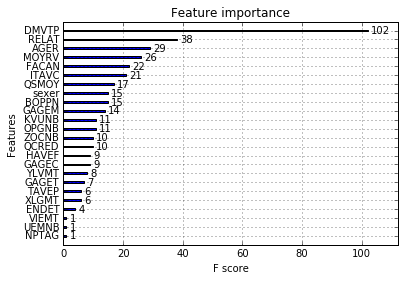

In [143]:
xgb.plot_importance(xgb1)

On remarque notamment que DMVTP (l'age du dernier mouvement) , RELAT (ancienneté de la relation client) et MOYRV (revenu moyen) semblent bien expliquer la discrimination dans les deux classes "COUI" et "CNON" de CARVP.

#### Courbes ROC:

Traçons enfin les courbes ROC (à partir du modèle obtenu avec GradientBoostingClassifier):

In [144]:
Y_score5 = cv_boost_opt.decision_function(X_testqn)
# note : "decision_function predict confidence scores for samples."

fpr5, tpr5, thresholds5 = metrics.roc_curve(Y_true, Y_score5)

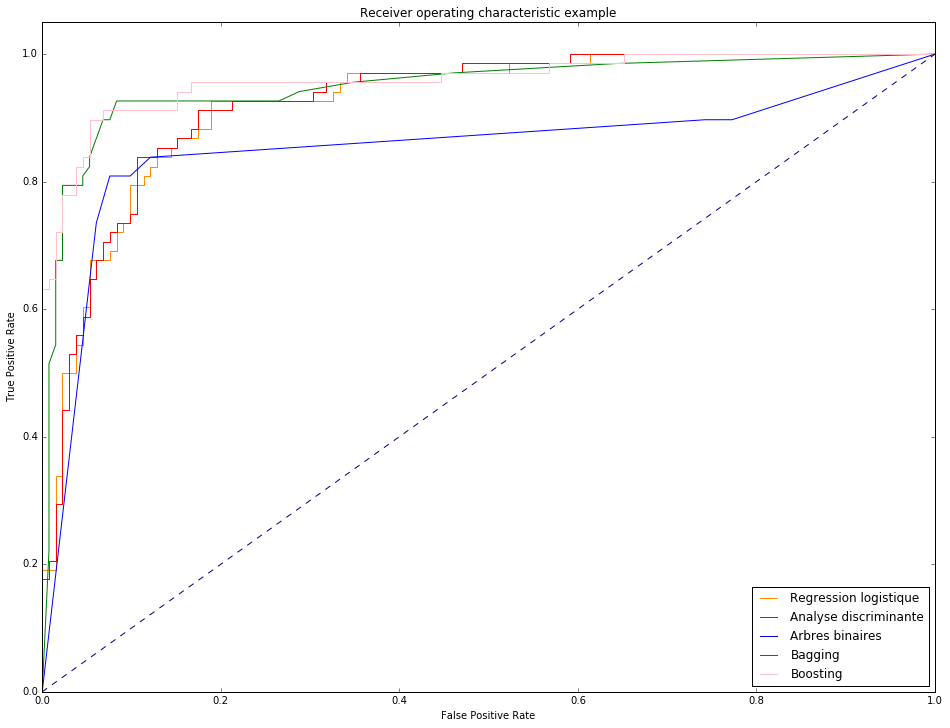

In [145]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')
plt.plot(fpr3, tpr3, color='blue', label='Arbres binaires')
plt.plot(fpr4, tpr4, color='green', label='Bagging')
plt.plot(fpr5, tpr5, color='pink', label='Boosting')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(roc_auc_score(Y_true, Y_score)) # Regression logistique 
print(roc_auc_score(Y_true, Y_score2[:,1])) # Analyse discriminante
print(roc_auc_score(Y_true, Y_score3)) # Arbres binaires de décision
print(roc_auc_score(Y_true, Y_score4)) # Bagging
print(roc_auc_score(Y_true, Y_score5)) # Boosting

Le boosting semble être pour le moment la meilleur famille de modèle.

#### Comparaison R vs Python

Dans les deux langages nous avons testé différents algorithmes et stratégies.

Le package **xgboost est disponible dans les deux langages** et pourrait donc être rajouté ici au scénario R et testé dans ce langage. 

Nous obtenions des résultats **sensiblement identitiques** du point de vue de l'erreur de prévision sur l'échantillon test avec une vingtaine de mals classés pour ce découpage de l'échantillon initial (voir même plutôt très légérement moins bon avec une petite vingtaine de mals classés), et ce également avec la méthode de "gradient boosting" de coefficient de shrinkage 0.1. 

Notons également que cette méthode nécessite sous scikit-learn un nombre d'iteration moindre pour optimiser l'erreur de validation à un coefficient de shrinkage donné (51 au lieu de 215 environ ici par exemple). 

### Random Forests

La dernière famille d'agrégation de modèles que nous allons étudier est celle des **forêts aléatoires**. 

On se place ici dans un cadre similaire à celui du bagging. Les randoms forests (qui utilisent comme leur nom l'indique des arbres de décision comme famille d'estimateurs) introduisent une aléarisation dans la construction de arbres utilisés. A l'établissement de chaque noeud on tire en effet aléatoirement $m$ variables parmis les $p$ disponibles.



In [146]:
#-- Importation des librairies --# 
from sklearn.ensemble import RandomForestClassifier

** Estimation: **

Estimons tout d'abord notre modèle avec des paramètres fixés: on prend ici dans un premier temps 500 arbres et la valeur par défault (soit $\sqrt{p}$ où p le nombre de prédicteurs considérés) pour le nombre de variables tirées aléatoirement pour la recherche de la division optimale d'un noeud (paramètre `max_features`).

Le premier de ces deux paramètres n'ayant généralement que peu d'influence (notamment car cette méthode est **faiblement exposée au risque de surapprentissage**), on se concentrera en particulier sur l'optimisation de la seconde.

On utilise (à l'instar du programme en R) **uniquement les prédicteurs quantitatifs**.

In [147]:
#-- définition des paramètres --#
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)

Calculons l'erreur **"out-of-bag"**: 

In [148]:
#-- apprentissage --#
forest = forest.fit(X_trainqn,Yb_train)
print("Erreur out-of-bag : {err}".format(err=1-forest.oob_score_))

Erreur out-of-bag : 0.100811123986


On s'intéresse également aux **coefficients d'importance** associés à chaque variable: on a choisi ici la décroisance du Gini (critère d'hétérogéniété)

In [149]:
MDG = forest.feature_importances_
Variables = X_trainqn.columns.values
d = {'MDG': MDG,'Variables': Variables }
df = pd.DataFrame(data=d)
df.sort_values('MDG', ascending  = False)
#sorted(MDG, reverse=True)

,MDG,Variables
3,0.131310,MOYRV
12,0.125711,DMVTP
11,0.107101,QCRED
0,0.077152,RELAT
14,0.064169,FACAN
10,0.055439,QSMOY
13,0.045791,BOPPN
25,0.044276,ITAVC
6,0.035041,GAGET
1,0.031438,AGER


On remarque qu'au sens de ce critère `MOYRV`, `QCRED` ou encore `DMVTP` sont parmis les variables les plus influente dans la classification, comme on avait pu le constater avec le boosting.


** Optimisation: **

On cherche maintenant à optimiser nos deux principaux paramètres de complexité:

* le nombre d'arbres (`n_estimators`)
* le nombre de variables tirées à chaque noeud (`max_features`)

In [150]:
#-- Recherche du "n_estimators" optimal par validation croisée --#
param=[{"n_estimators":list(range(1,500,50))}]
forest_2 = GridSearchCV(RandomForestClassifier(),param,cv=5,n_jobs=-1)
forest_2_opt = forest_2.fit(X_trainqn, Yb_train)

best_n_est = forest_2_opt.best_params_
print("Meilleur nombre d'arbre obtenu par validation croisée: {n}".format(n=best_n_est))

Meilleur nombre d'arbre obtenu par validation croisée: {'n_estimators': 301}


Cependant ce paramètre n'est, comme nous l'avons vu, pas le plus important à minimiser et n'a pas beaucoup d'influence. 

On optimise donc maintenant le `max_features`.

In [151]:
#-- Recherche du "max_features" optimal par validation croisée --#
param=[{"max_features":list(range(1,28,2))}]
forest_3 = GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
forest_3_opt = forest_3.fit(X_trainqn, Yb_train)

best_max_feat = forest_3_opt.best_params_
print("Meilleur nombre de variables utilisée à chaque noeud obtenu par validation croisée: {n}".format(n=best_max_feat))

Meilleur nombre de variables utilisée à chaque noeud obtenu par validation croisée: {'max_features': 25}


On calcule l'erreur out-of-bag de ce modèle optimisé pour le paramètre `max_features`:

In [152]:
forest_opt = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None,min_samples_split=2, 
                min_samples_leaf=1, max_features=17,max_leaf_nodes=None,bootstrap=True, oob_score=True)

#-- Erreur out-of-bag --#
forest_opt_fit =forest_opt.fit(X_trainqn,Yb_train)
 
print("Erreur out-of-bag : {err}".format(err=1-forest_opt_fit.oob_score_))

Erreur out-of-bag : 0.0938586326767


Nous remarquons que cette optimisation n'a pas une influence énorme mais conservons cependant ce paramètrage.

** Erreur de test: **

Calculons l'**erreur de prévision sur le test** pour ce modèle: 

In [153]:
RF = RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=None,min_samples_split=2, 
                min_samples_leaf=1, max_features=17,max_leaf_nodes=None,bootstrap=True, oob_score=True)
RF_Fit = RF.fit(X_trainqn,Yb_train)

#-- Erreur de test --#
1-RF_Fit.score(X_testqn,Yb_test)



0.07999999999999996

In [154]:
pred = RF_Fit.predict(X_testqn)
pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit']) 

Prédit,0,1
Observés,,
0,126,6
1,10,58


** Courbes ROC:**

In [155]:
Y_score6 = RF.predict_proba(X_testqn)[:, 1]
# note : "decision_function predict confidence scores for samples."

fpr6, tpr6, thresholds6 = metrics.roc_curve(Y_true, Y_score6)

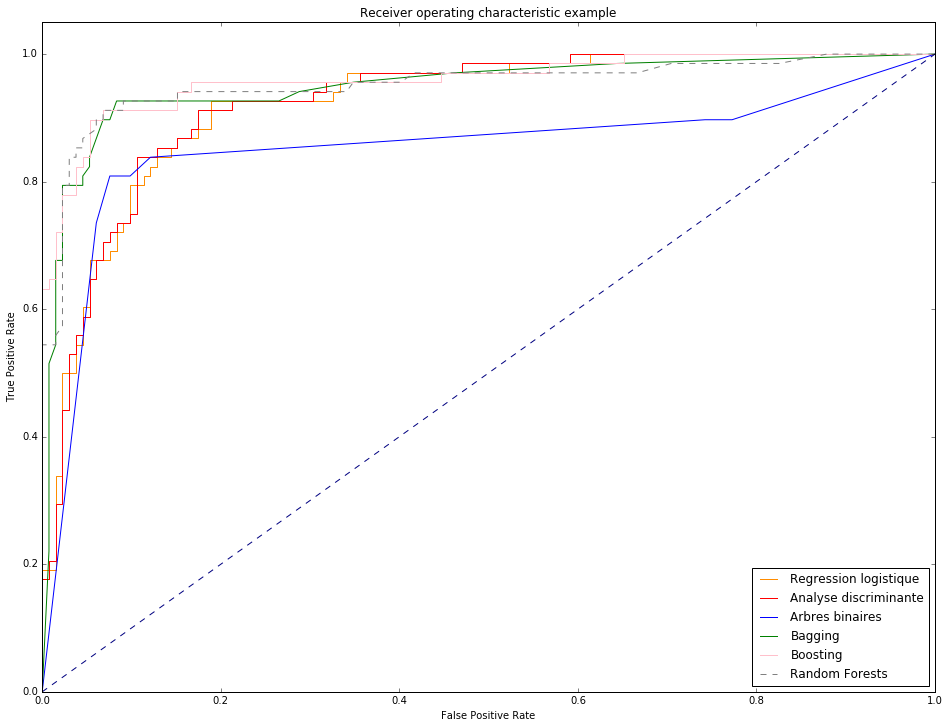

In [156]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')
plt.plot(fpr3, tpr3, color='blue', label='Arbres binaires')
plt.plot(fpr4, tpr4, color='green', label='Bagging')
plt.plot(fpr5, tpr5, color='pink', label='Boosting')
plt.plot(fpr6, tpr6, color='grey', linestyle='--', label='Random Forests')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [157]:
print("AUC Regression Logistique: {:.4f}".format(roc_auc_score(Y_true, Y_score)))
print("AUC Analyse discriminante: {:.4f}".format(roc_auc_score(Y_true, Y_score2[:,1])))
print("AUC Arbres binaires de décision: {:.4f}".format(roc_auc_score(Y_true, Y_score3)))
print("Bagging: {:.4f}".format(roc_auc_score(Y_true, Y_score4)))
print("Boosting: {:.4f}".format(roc_auc_score(Y_true, Y_score5)))
print("Random_Forests: {:.4f}".format(roc_auc_score(Y_true, Y_score6)))  

AUC Regression Logistique: 0.9231
AUC Analyse discriminante: 0.9251
AUC Arbres binaires de décision: 0.8528
Bagging: 0.9489
Boosting: 0.9596
Random_Forests: 0.9520


Les trois méthodes d'aggregation de modèle semblent plus performantes que les méthodes précédement étudiées.

#### Comparaison R vs Python:

Nous obervons finalement assez peu de différences d'utilisation des Random Forest entre R et Python.

Les résultats semblent à priori légerement moins bon sur R, mais, encore une fois, nous conclurons sur cet aspect de performances lors de comparaisons des modèles sur plusieurs découpages des échantillons de test et d'apprentissage.

## Marchines à vecteurs supports 

La dernière famille de modèles que nous étudions sont les **"SVM"** (Séparateur à vaste marge / Support vector machine).

Nous optimiserons pour ce modèles le **coût de mauvais classement** (nommé ici **C**) et, dans le cadre du noyaux gaussien, le paramètre **"gamma"** de la gaussienne.

Nous testerons en tout trois types de **noyaux**. 

Les **variables quantitatives** seront ici utilisées.

### Options par défault 

In [158]:
from sklearn.svm import SVC

On a besoin de données centrées et réduites pour cette méthode.

In [159]:
from sklearn import preprocessing
X_trainqn_CR = preprocessing.scale(X_trainqn)
X_testqn_CR = preprocessing.scale(X_testqn)

In [160]:
# Verification que le param par défault correspondent à ceux de R faite
svm_0 = SVC(C=1.0, gamma = 'auto', kernel='rbf', probability= False, shrinking = True, tol=0.001, coef0=0, degree=3)
svm_0Fit = svm_0.fit(X_trainqn_CR, Yb_train)

In [161]:
#-- Nombre de support vecteur --#
print(svm_0Fit.n_support_)

[250 239]


In [162]:
print(1-svm_0Fit.score(X_testqn_CR,Yb_test))
pred = svm_0Fit.predict(X_testqn_CR)
table = pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit'])
table

0.14


Prédit,0,1
Observés,,
0,120,12
1,16,52


### Choix de Gamma et C par CV:

Cherchons maitenant à optimiser les deux paramètres "C" et "gamma".

Nous allons ici, de la même manière que sous R, optimiser les deux paramètres simultanément:

In [163]:
#-- Definition "à taton" d'une grille pour la cross-validation --#
gr = np.concatenate(([0.001, 0.005, 0.007], np.arange(0.01,0.23, 0.01)), axis=0)

In [164]:
from sklearn.model_selection import GridSearchCV
C_range = 2.**np.arange(-2,5)  # valeur dans le code R: 2.**np.arange(-2,5)
gamma_range = gr    # valeur dans le code R: 2.**np.arange(-8,-4)orangered
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
gridFit = grid.fit(X_trainqn_CR, Yb_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 8.0, 'gamma': 0.0050000000000000001} with a score of 0.80


Nous pouvons utiliser la représentation graphique ci-dessous pour afiner notre grille au fur-et-à mesure.
En effet, la cellule précédente (cross validation sur la grille) étant longue à executer nous avons favorisé une approche "pas-à-pas" de la manière que dans le script R.  

In [165]:
scores = gridFit.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

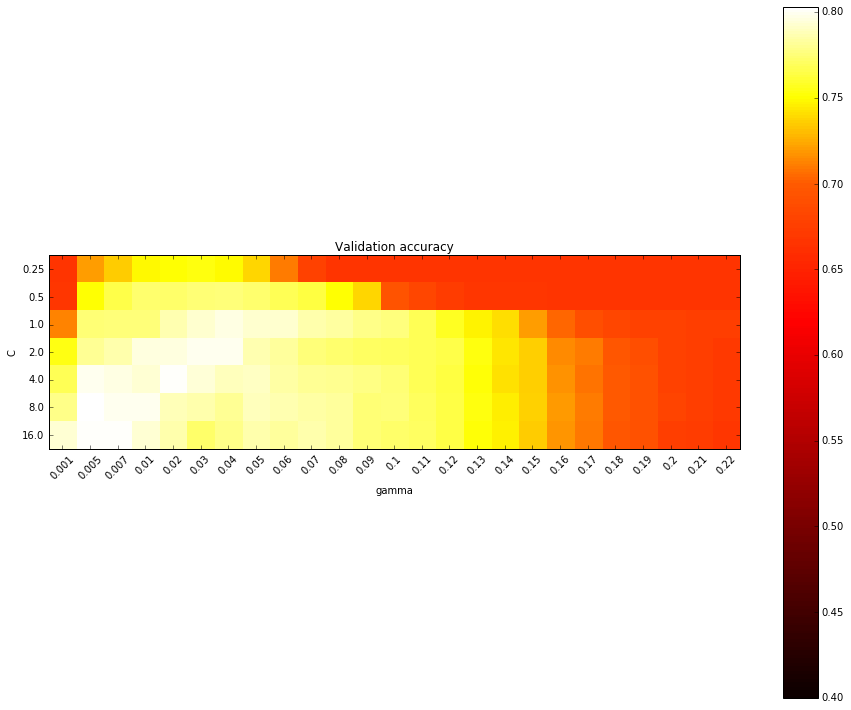

In [166]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.4, midpoint=0.7))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [167]:
C_opt = grid.best_params_['C']
gamma_opt = grid.best_params_['gamma']

In [168]:
svm_opt = SVC(C=C_opt, cache_size=200, class_weight=None, gamma=gamma_opt, kernel='rbf', verbose=False)
svm_optFit = svm_opt.fit(X_trainqn_CR, Yb_train)

#-- Erreur de test --#
1-svm_optFit.score(X_testqn_CR,Yb_test)

0.14000000000000001

In [169]:
#-- Matrice de confusion --#
pred = svm_opt.predict(X_testqn_CR)
table=pd.crosstab(Yb_test, pred, rownames=['Observés'], colnames=['Prédit'] )
table

Prédit,0,1
Observés,,
0,120,12
1,16,52


### Test avec d'autres noyaux 

On teste desormais avec d'autres types de noyaux.

Les paramètres sont **grossièrement optimisés**  (on n'étudiera ici que le paramètre `C` . Une optimisation (non réalisée dans le code référence sur R) plus "fine" seraient une piste de développement de cette étude.

* **Noyaux polynomial** 

In [170]:
C_range = 2.**np.arange(-2,5)
param=[{"C":list(2.**np.arange(-2,5))}]
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid=param)
svm_polyFit = svm_poly.fit(X_trainqn_CR, Yb_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 8.0, 'gamma': 0.0050000000000000001} with a score of 0.80


In [171]:
#-- Erreur de test --#
1-svm_polyFit.score(X_testqn_CR,Yb_test)

0.22499999999999998

In [172]:
#-- Matrice de confusion --#
pred = svm_poly.predict(X_testqn_CR)
table=pd.crosstab(Yb_test, pred , rownames=['Observés'], colnames=['Prédit'])
table

Prédit,0,1
Observés,,
0,117,15
1,30,38


* **Noyaux Sigmoïdal**

In [173]:
C_range = 2.**np.arange(-2,5)
param=[{"C":list(2.**np.arange(-2,5))}]
svm_sigmo = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param)
svm_sigmoFit = svm_sigmo.fit(X_trainqn_CR, Yb_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 8.0, 'gamma': 0.0050000000000000001} with a score of 0.80


In [174]:
#-- Erreur de test --#
1-svm_sigmoFit.score(X_testqn_CR,Yb_test)

0.20999999999999996

In [175]:
# Les SVM présentant des erreurs atypiques sont laissés de côté.
plt.figure()
#-- Matrice de confusion --#
pred = svm_sigmo.predict(X_testqn_CR)
table=pd.crosstab(Yb_test, pred ,rownames=['Observés'], colnames=['Prédit'])
table

Prédit,0,1
Observés,,
0,119,13
1,29,39


Ces résultats sont bien entendu donnés ici à titre indicatif.

### Courbes ROC 

In [176]:
Y_score7 = svm_optFit.decision_function(X_testqn_CR)
# note : "decision_function predict confidence scores for samples."

fpr7, tpr7, thresholds7 = metrics.roc_curve(Y_true, Y_score7)

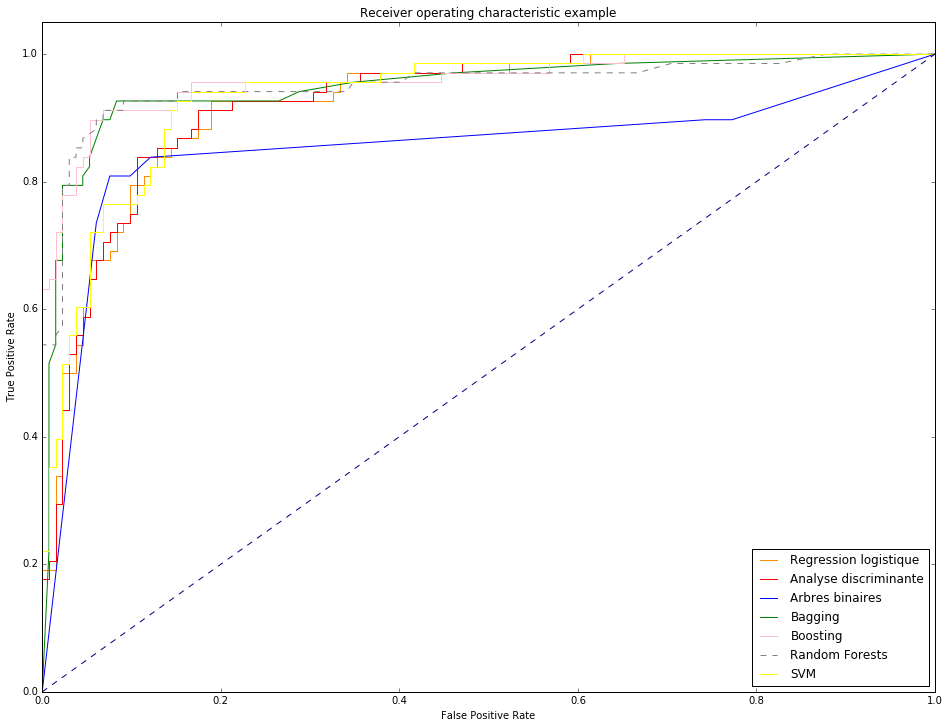

In [177]:
plt.figure(figsize=(16, 12))

plt.plot(fpr, tpr, color='darkorange', label='Regression logistique')
plt.plot(fpr2, tpr2, color='red', label='Analyse discriminante')
plt.plot(fpr3, tpr3, color='blue', label='Arbres binaires')
plt.plot(fpr4, tpr4, color='green', label='Bagging')
plt.plot(fpr5, tpr5, color='pink', label='Boosting')
plt.plot(fpr6, tpr6, color='grey', linestyle='--', label='Random Forests')
plt.plot(fpr7, tpr7, color='yellow', label='SVM')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


plt.show()

In [178]:
print("AUC Regression Logistique: {:.4f}".format(roc_auc_score(Y_true, Y_score))) # Regression logistique 
print("AUC Analyse discriminante: {:.4f}".format(roc_auc_score(Y_true, Y_score2[:,1]))) # Analyse discriminante
print("AUC Arbres binaires de décision: {:.4f}".format(roc_auc_score(Y_true, Y_score3))) # Arbres binaires de décision
print("Bagging: {:.4f}".format(roc_auc_score(Y_true, Y_score4))) # Bagging
print("Boosting: {:.4f}".format(roc_auc_score(Y_true, Y_score5))) # Boosting
print("Random_Forests: {:.4f}".format(roc_auc_score(Y_true, Y_score6))) # Random_Forests
print("SVM: {:.4f}".format(roc_auc_score(Y_true, Y_score7))) # SVM

AUC Regression Logistique: 0.9231
AUC Analyse discriminante: 0.9251
AUC Arbres binaires de décision: 0.8528
Bagging: 0.9489
Boosting: 0.9596
Random_Forests: 0.9520
SVM: 0.9357


#### Comparaisons R vs Python

Rien de notable à signaler pour les SVM en terme de fonctionalité si ce n'est la possibilité d'avoir des représentation graphiques par courbe de niveau sous R pour l'optimisation de deux paramètres simultanément. Nous avons ici tenté de reproduire un outil similaire. 

## Comparaison des méthodes 

Nous avons desormais étudié l'ensemble des méthodes que nous souhaitions considérer. 

Nous avons déjà à disposition des outils de comparaisons de chaque famille de modèle (de leurs "champions" respectifs) grâce:

* aux **erreurs de prévision sur les échantillons test** 
* aux **courbes ROC et au aires AUC associées**

Cependant, afin d'avoir des critères de comparaisons plus "robustes", l'idée est de réaliser plusieurs découpages différents des échantillons d'apprentissage et de test afin de réestimer et regler la complexité de nos modèles puis de calculer les erreurs de prévision sur l'échantillon test.



In [179]:
x = np.arange(n_estimators) + 1
cv_score = cv_estimate(10)
best_iter_2 = x[np.argmin(cv_score)]

In [180]:
params_0 = {'loss': 'exponential', 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5} #, 'random_state': 3, , 
cv_boost = GradientBoostingClassifier(**params_0)

In [181]:
n_estimators = params_0['n_estimators']
x = np.arange(n_estimators) + 1

#-- Fonction calculant l'erreur de test --#
# mod: le modèle considéré, X_test/Y: l'échantillon de test considéré (prédicteur/réponse)
def heldout_score(mod, Xtest, Ytest):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(mod.staged_decision_function(Xtest)): # staged_decision_function: fct dec pour chaque iteration
        score[i] = mod.loss_(Ytest, y_pred)
    return score # vecteur avec les score correspondants à chaque parametrage (ie nb d'arbre)


#-- "K-Folds" cross-validation (on prend par défault K=10) --#
# On découpes en sous échantillons de test et d'apprentissage par méthode K-fold 
# qui sont réutilisés avec la fonction au dessus 
def cv_estimate(n_splits=10):
    cv = KFold(n_splits = n_splits)
    cv_boost = GradientBoostingClassifier(**params_0)
    val_scores = np.zeros((n_estimators,), dtype=np.float64) # stocke les scores par estimateur 
    # La boucle suivante calcule l'erreur de cv
    for train, test in cv.split(X_trainqn, Yb_train): # à chaque iter on sel. l'ech de test et celui d'app. selon K-Fold cv.
        cv_boost.fit(X_trainqn.iloc[train], Yb_train[train]) # on ajuste le modèle
        val_scores += heldout_score(cv_boost, X_trainqn.iloc[test], Yb_train[test]) # on calcule le score d'erreur cumulé grâce à heldout_score
    val_scores /= n_splits # on divise par le nombre de fold de la cv pour avoir la moyenne des erreurs pour chaque estimateur
    return val_scores

### Réalisation de la "boucle"

On compare en utilisants principalement les "champions" de chaques familles de modèles. Afin de conserver des temps d'execution raisonables nous simplifions égalements certaines procédures d'optimisation de paramètre de complexité des paramètres.

Nous considérons donc ici:

| Modèle   |      Parametre     |      Grille     |   Prédicteurs    |
|----------|:-------------:|------------:|------------:|
| **Régression logistique** par pénalisation Lasso |  pénalisation L1 | (0.5,1,5,10,12,15,30) | quantitatifs| 
| **Analyse Discriminante ** (cadre "Normal") linéaire|  - | - | quantitatifs| 
| **Arbres de décision ** |  profondeur maximale | de 2 à 20 | quantitatifs| 
| **Bagging ** |  - | - | quantitatifs| 
| **Boosting ** version adaptative boosting "standard" |  profondeur maximale | de 3 à 20 | quantitatifs| 
| **Gradient boosing ** (shrinkage de 0.1) |  nombre d'estimateurs/iterations | de 1 à 300 | quantitatifs| 
| **Gradient boosing ** avec XGboost |  nombre d'estimateurs et shrinkage | resp. (0.1, 0.01, 0.001) et de 1 à 3000 | quantitatifs| 
| **Random forests**  |  profondeur maximale | de 3 à 20 | quantitatifs| 
| **SVMs** à noyaux gaussien  |  Paramètre gamma, coût de mauvais classement |  (0.4,0.5,0.6,0.8,1,1.4) pour C | quantitatifs centrés reduits| 

On porte ici une attention particulière au boosting (trois types d'implementation) notamment car cette méthode fut l'une des plus "performantes" jusqu'à présent.

In [210]:
from sklearn.utils import check_random_state
import time
check_random_state(157)
tps0=time.clock()
#-- Nombre d'itérations --#
B=30

# grille pour la SVM
gr = np.concatenate(([0.001, 0.005, 0.007], np.arange(0.01,0.23, 0.01)), axis=0)
param_test2 = {'learning_rate':[1, 0.1, 0.01],'n_estimators':list(np.arange(1,3000, 400))}



#-- définition des grilles de paramètres --# 
# simplifié pour le moment 
listMethGrid=[[logit,{"C":[0.5,1,5,10,12,15,30]}], # pén. lasso (cv sur la péna.)
              [AD_lin,{"C":[1]}], # pas d'opti., version linéaire
              [Arbre_quant,{"max_depth":list(range(1,20))}], # sur la prof. max avec pred. quant.
              [vpBagQn,{"C":[1]}], # Bagging avec pred. quant. (pas d'opti.)
              [vpAdBoost,{"C":[1]}], # Adaboost (20 est., 3 de prof. et pas d'opti.# Les SVM présentant des erreurs atypiques sont laissés de côté.
              [cv_boost,{"C":[1]}], 
              [xgb1,param_test2], 
              [RF, {"max_features":list(range(1,15,2))}],
              [svm_opt,{"C":[0.4,0.5,0.6,0.8,1,1.4], "gamma": gr}]    
             ]
            
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
arrayErreur=np.empty((B,9))
for i in range(B):   
    #-- Extraction apprentissage et test totaux --#
    X_train_tot,X_test_tot,Y_train,Y_test=train_test_split(X,Y,test_size=200)
    #-- Extraction du premier jeu de données composé des var. qualitatives --#
    X_train_1 = X_train_tot[varqual]
    X_test_1 = X_test_tot[varqual]
    #-- obtention des indicatrices associées à chacunes des modalités --#
    X_train = pd.get_dummies(X_train_1)
    X_test = pd.get_dummies(X_test_1)
    
    
    #-- Extraction du premier jeu de données composé des var. quantitatives --#
    #-- Recodage pour éch. d'app. --#
    sexer = le.fit_transform(X_train_tot.SEXEQ) 
    familr = le.fit_transform(X_train_tot.FAMIQ)
    #-- Recodage pour éch. de test. --#
    sexer_t = le.fit_transform(X_test_tot.SEXEQ) 
    familr_t = le.fit_transform(X_test_tot.FAMIQ)
    #-On extrait le jeu de données qui nous interesse --#
    X_trainqn=X_train_tot[varquant]
    X_testqn=X_test_tot[varquant]
    #-- On rajoute les deux variables sexer et familr --#
    X_trainqn["sexer"] = sexer
    X_trainqn["familr"] = familr
    X_testqn["sexer"] = sexer_t
    X_testqn["familr"] = familr_t
    
    #-- Pour les SVM --#
    X_trainqn_CR = preprocessing.scale(X_trainqn)
    X_testqn_CR = preprocessing.scale(X_testqn)
        
    Yb_train = le.fit_transform(Y_train)
    Yb_test = le.fit_transform(Y_test)

    #-- optimisation de chaque méthode et calcul de l'erreur sur le test: on distingues certaines méthodes --#
    for j,(method, grid_list) in enumerate(listMethGrid):
            
        if (method == svm_opt): # les SVM utilisent les données re-normalisées
            methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(X_trainqn_CR, Yb_train)
            methodOpt = methodGrid.best_estimator_
            methFit=methodOpt.fit(X_trainqn_CR, Yb_train)
            arrayErreur[i,j]=1-methFit.score(X_testqn_CR,Yb_test)
            
        elif (method == AD_lin or method == vpBagQn or method == vpAdBoost): # méthodes ou aucune optimisation n'as été faite
            methFit = method.fit(X_trainqn, Yb_train)   
            arrayErreur[i,j]=1-methFit.score(X_testqn,Yb_test)
            
        elif (method == cv_boost): # le gradient boosting 
            n_estimators = 300
            x = np.arange(n_estimators) + 1
            cv_score = cv_estimate(10)
            best_iter = x[np.argmin(cv_score)] # le meilleur nombre d'itération
            params_0 = {'loss': 'exponential', 'n_estimators': best_iter, 'max_depth': 3, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5} #, 'random_state': 3, , 
            cv_boostOpt = GradientBoostingClassifier(**params_0)
            methFit=cv_boostOpt.fit(X_trainqn, Yb_train)
            arrayErreur[i,j]=1-methFit.score(X_testqn,Yb_test)

            
        else:   # le reste des méthodes        
            methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(X_trainqn, Yb_train)
            methodOpt = methodGrid.best_estimator_    

            methFit=methodOpt.fit(X_trainqn, Yb_train)
            arrayErreur[i,j]=1-methFit.score(X_testqn,Yb_test)            


tps1=time.clock()
print("Temps execution en mn :",(tps1 - tps0)/60)
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Logit", "AD_lin", "ABD", "vp_bagQn", "vpAdBoost", "cv_boost", "xgboost", "RF", "SVM"])    

('Temps execution en mn :', 5.084060783333333)


On obtiens les resultats suivants après 1h05 d'execution:

In [212]:
dataframeErreur

,Logit,AD_lin,ABD,vp_bagQn,vpAdBoost,cv_boost,xgboost,RF,SVM
0,0.170,0.195,0.105,0.090,0.150,0.095,0.090,0.080,0.145
1,0.175,0.150,0.085,0.070,0.130,0.065,0.050,0.060,0.160
2,0.175,0.155,0.110,0.095,0.125,0.080,0.080,0.090,0.160
3,0.140,0.130,0.125,0.085,0.120,0.070,0.070,0.060,0.135
4,0.170,0.165,0.130,0.070,0.090,0.070,0.060,0.095,0.190
5,0.205,0.190,0.160,0.145,0.135,0.120,0.125,0.135,0.175
6,0.220,0.215,0.130,0.140,0.145,0.105,0.090,0.105,0.205
7,0.200,0.205,0.140,0.090,0.170,0.090,0.075,0.125,0.200
8,0.220,0.215,0.150,0.090,0.155,0.095,0.090,0.085,0.205
9,0.175,0.165,0.140,0.105,0.130,0.095,0.095,0.115,0.165


On observa la distribution des erreurs en traçants les boxplots associés aux erreurs de chaque méthode:

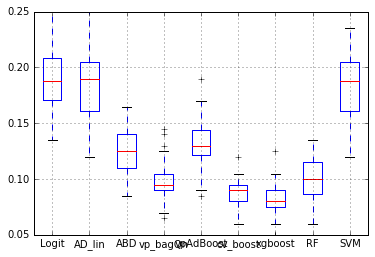

In [213]:
#-- Distribution des erreurs de prévisions --#    
plt.figure(figsize=(8, 6))
dataframeErreur.boxplot(return_type='dict')
plt.show()

In [214]:
dataframeErreur.mean()

Logit        0.187333
AD_lin       0.184167
ABD          0.126000
vp_bagQn     0.098500
vpAdBoost    0.130500
cv_boost     0.086333
xgboost      0.082333
RF           0.099333
SVM          0.182667
dtype: float64

Nous remarquons ici que les **méthodes d'aggregation de modèles** semblent être les plus performantes du point de vu de l'erreur de prévision sur l'échantillon test. Parmis elle le boosting se distingue avec des résultats assez convaincants avec notamment l'algorithme XGboost.

Les arbres binaires de décision suivent de près, tandis que les SVM, la regression logistique et l'analyse discriminante obtiennent des résultats moins bons. 

Les courbes ROC peuvent également être tracées à condition de stocker les attributs `decision_function` de chaque modèle, ce qui n'as pas été fait ici dans le but de ne pas ralonger les temps d'execution déjà relativement long.

### Comparaison avec les résultats de R

Nous obtenons des resultats **sensiblement similaires** grâce à l'étude déroulée sous R (après 50 itérations lors de l'étape de comparaison des modèles) avec comme meilleur erreur moyenne 9.05% pour le boosting.
<center>
<img src="https://github.com/MerwannSelmani/Apprentissage-Stat/blob/master/R_boxplot.png?raw=true" style="display: inline"/>
</center>

## Conclusion générale 

### Choix du modèle pour la réalisation de score d'appétence 

Le modèle priviligié ici serait donc ici le boosting (ou éventuellement d'autres méthodes d'aggrégation de modèle). Même si l'interprétabilité pour ce modèles est moins triviale que pour d'autres, il propose cependant la possibilité de connaitre les variables les plus influentes dans la classification. 


### Note sur ce calepin

Ce calepin reste bien entendu pas exhaustif et présente différentes stratégies dont certaines pourraient être afinées/améliorées. 

## <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="R"/></a> vs  <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a> :


Nous avons donc lors de ce projet utilisé conjointement deux langages pour réaliser cette étude. Concluons donc sur les avantages et inconvénients relatifs des deux approches.

Nous avons pu constater que la practicité de la librairie scikit-learn que nous avons majoritairement utilisé pour l'implémentation des méthodes étudiées. En effet son utilisation est facilitée par une syntaxe analogue dans chaque cas, ainsi qu'une implentation facile d'utilisation de la validation croisée (et donc la mise en place d'une boucle sur les échantillons d'apprentissage et de test lors de la comparaison des modèles). 

Cette librairie est par ailleurs bien documentée avec un détail assez explicite des paramètres des fonctions et de nombreux exemples illustratifs (ce qui n'est pas toujours le cas de tout les packages R utilisés dans ce travail).

Cependant, cette librairie présente quelques manques notables, commme l'absence de l'élagage des arbres de décision notamment. 

Certaines difficultés liées à l'installation des packages sur les différents logiciels d'exploitation peuvent également être gênants (par exemple l'installation de XGboost sous windows, ou de MCA sous linux...).

Concernant R, le package caret est un outil très pratique permettant de retrouver plusieurs des avantages présent sous scikit-learn avec une synthaxe générique pour les différentes méthodes d'apprentissage notamment. Son utilisation pourrait être une bonne piste d'amélioration pour la version R de cette étude.

Enfin, d'un point de vu des temps d'exécution, nous avons également put remarque l'avantage de Python vis à vis du langage R.